In [1]:
import mglearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = mglearn.datasets.make_forge()
print('X Sahpe', X.shape)

X Sahpe (26, 2)


Text(0,0.5,'2nd Feature')

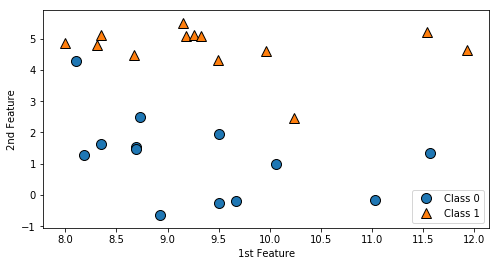

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['Class 0','Class 1'], loc=4)
plt.xlabel('1st Feature')
plt.ylabel('2nd Feature')

Text(0,0.5,'Target')

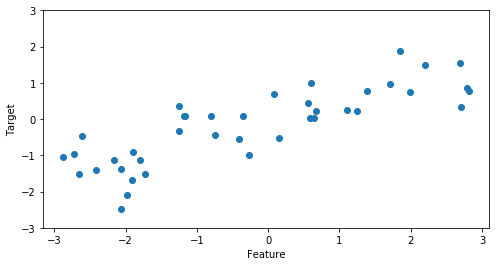

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.figure(figsize=(8,4))
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel('Target')

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('Cancer.keys()',cancer.keys())

Cancer.keys() dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [6]:
print('Type of Breast Cancer', cancer.data.shape)

Type of Breast Cancer (569, 30)


In [7]:
import numpy as np
print('Sample count by Class',{n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample count by Class {'malignant': 212, 'benign': 357}


benign 양성 malignant 악성

In [8]:
print("Feature Name : ", cancer.feature_names)

Feature Name :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Breast Cancer KNeighbors Classify

In [9]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [12]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
print("Test Set Prediction : ", clf.predict(X_test))

Test Set Prediction :  [1 0 1 0 1 0 0]


In [14]:
print("Test Set Accuracy : {:.3f}".format(clf.score(X_test, y_test)))

Test Set Accuracy : 0.857


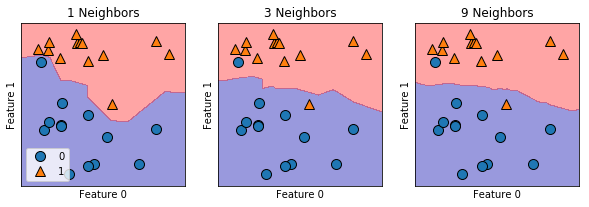

In [15]:
fig, axs = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axs):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} Neighbors".format(n_neighbors))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel("Feature 1")
axs[0].legend(loc=3)

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [17]:
train_accuracy = []
test_accuracy = []

In [18]:
neighbors_settings = range(1,11)

In [19]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_accuracy.append( clf.score(X_train, y_train ))
    test_accuracy.append( clf.score(X_test, y_test ))

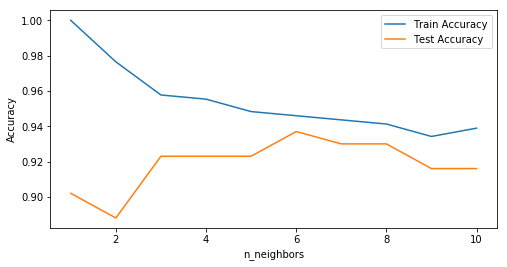

In [20]:
plt.figure(figsize=(8,4))
plt.plot(neighbors_settings, train_accuracy, label='Train Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Naive Bayenes

### BernoulliNB

In [21]:
import numpy as np

In [22]:
X = np.array([
             [0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y = np.array([0,1,0,1])

In [23]:
counts = {}
for label in np.unique(y):
    print(label, X[y==label])
    counts[label] = X[y==label].mean(axis=0)
    print("Feature Count:\n", counts)

0 [[0 1 0 1]
 [0 0 0 1]]
Feature Count:
 {0: array([0. , 0.5, 0. , 1. ])}
1 [[1 0 1 1]
 [1 0 1 0]]
Feature Count:
 {0: array([0. , 0.5, 0. , 1. ]), 1: array([1. , 0. , 1. , 0.5])}


In [24]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

In [25]:
model_bern.predict(X)

array([0, 1, 0, 1])

## Decision Tree

### Decision Tree Classifier

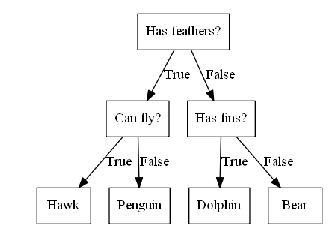

In [26]:
mglearn.plots.plot_animal_tree()

In [27]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Train Data Accuracy : {:.3f}".format(tree.score(X_train, y_train)))
print("Test Data Accuracy : {:.3f}".format(tree.score(X_test, y_test)))

Train Data Accuracy : 1.000
Test Data Accuracy : 0.937


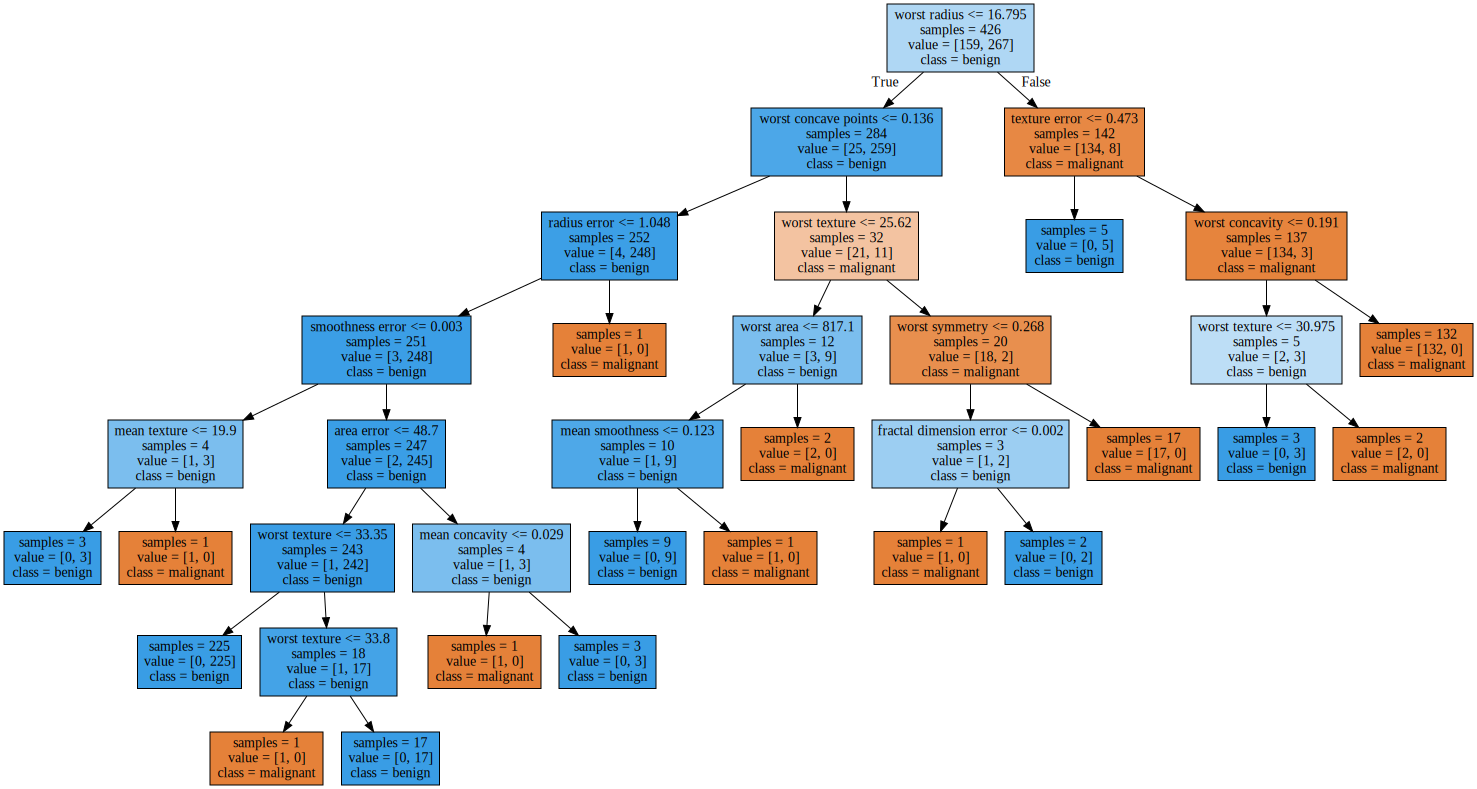

In [28]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'benign'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [29]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Train Data Accuracy : {:.3f}".format(tree.score(X_train, y_train)))
print("Test Data Accuracy : {:.3f}".format(tree.score(X_test, y_test)))

Train Data Accuracy : 0.988
Test Data Accuracy : 0.951


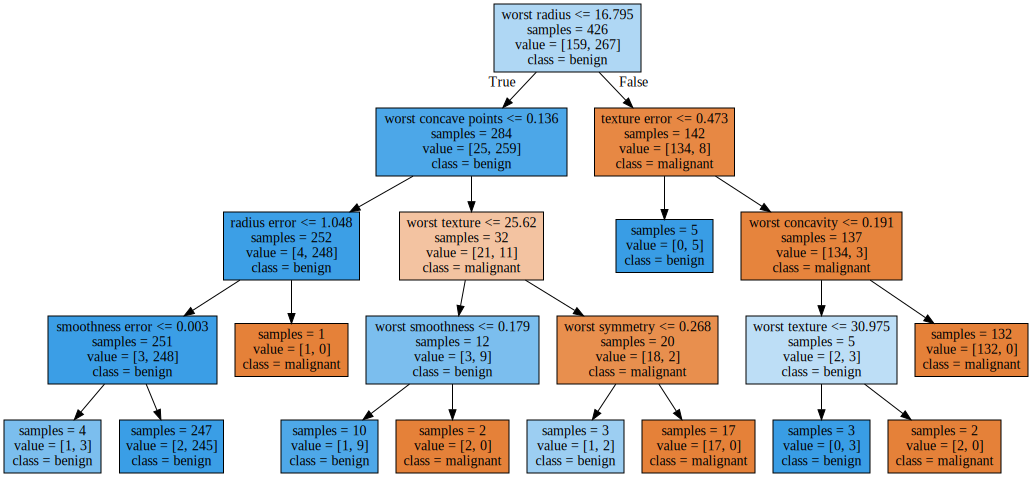

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree_4.dot', class_names=['malignant', 'benign'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz
with open('tree_4.dot') as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [31]:
print("Feature Importances:", tree.feature_importances_)

Feature Importances: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [32]:
def plot_feature_importances(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(12,10))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Importances')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)

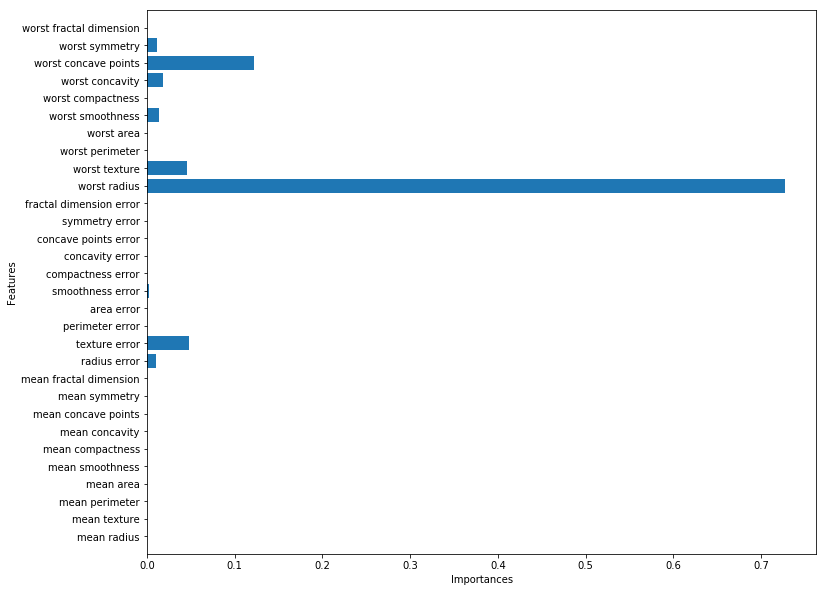

In [33]:
plot_feature_importances(tree)

Feature importances: [0. 1.]


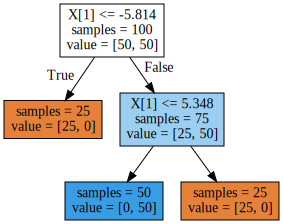

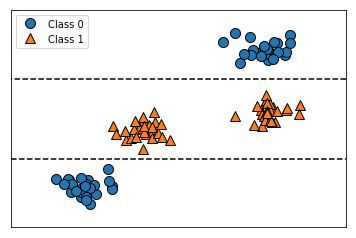

In [34]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

### Decision Tree Regressor

Text(0,0.5,'price ($/Mbyte)')

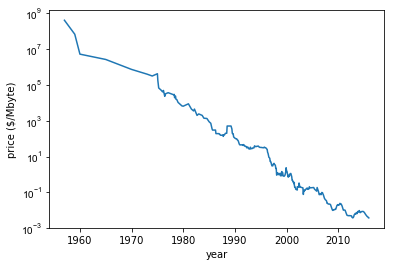

In [35]:
import os
import pandas as pd
ram_prices = pd.read_csv('./data/ram_price.csv')

plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('price ($/Mbyte)')

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

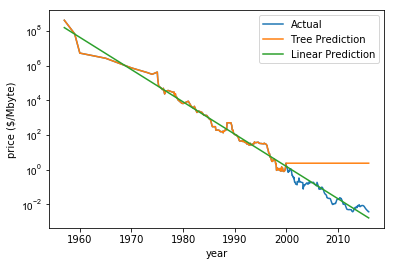

In [37]:
plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price, label='Actual')
plt.semilogy(ram_prices.date, price_tree, label='Tree Prediction')
plt.semilogy(ram_prices.date, price_lr, label='Linear Prediction')
plt.xlabel('year')
plt.ylabel('price ($/Mbyte)')
plt.legend()

## RandomForeast

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_Test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

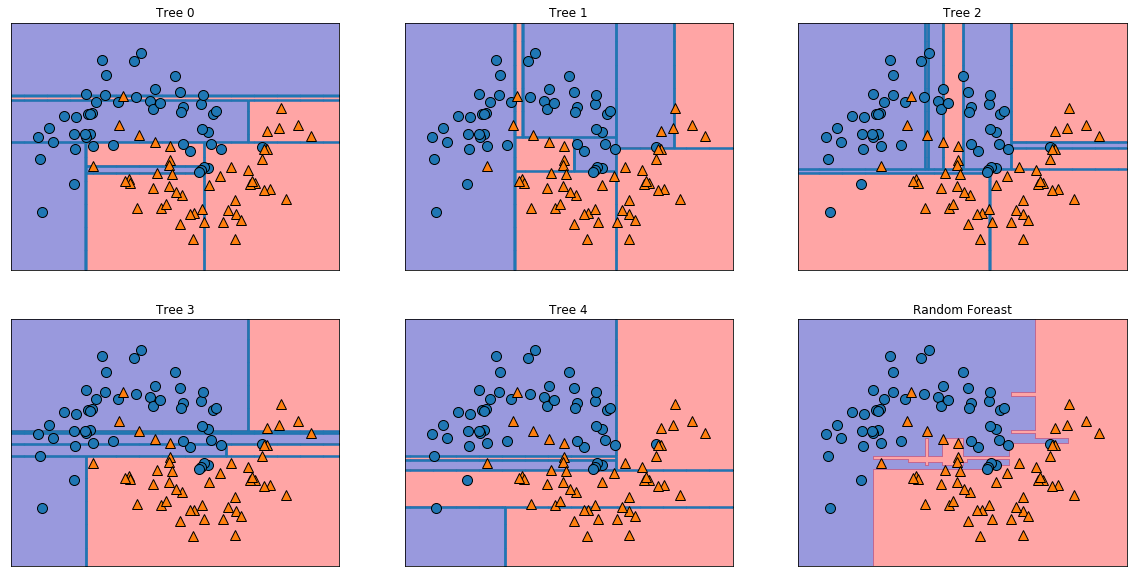

In [39]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axs.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axs[-1,-1], alpha=.4)
axs[-1,-1].set_title('Random Foreast')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)

print("Train Data Accuracy : {:.3f}".format(forest.score(X_train, y_train)))
print("Test Data Accuracy : {:.3f}".format(forest.score(X_test, y_test)))

Train Data Accuracy : 1.000
Test Data Accuracy : 0.972


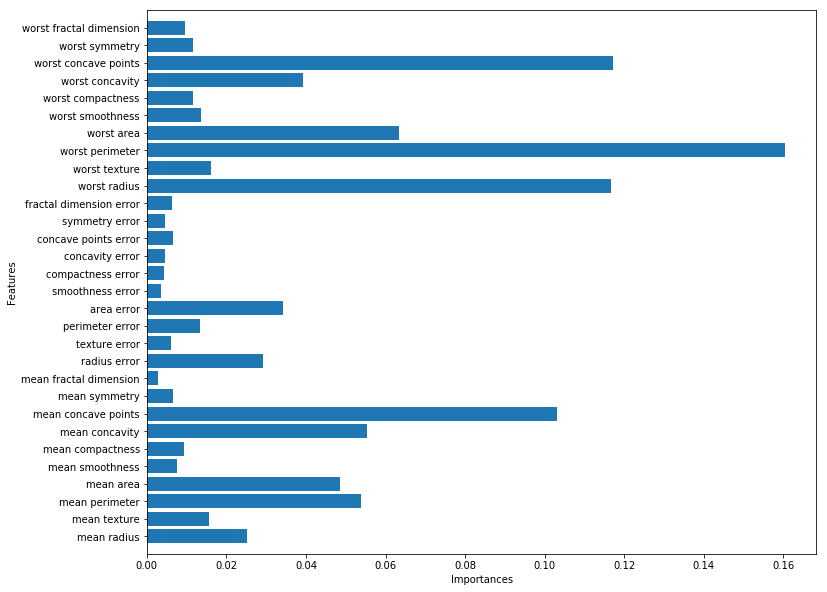

In [41]:
plot_feature_importances(forest)

## Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Train Data Accuracy : {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Data Accuracy : {:.3f}".format(gbrt.score(X_test, y_test)))

Train Data Accuracy : 1.000
Test Data Accuracy : 0.958


In [43]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Train Data Accuracy : {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Data Accuracy : {:.3f}".format(gbrt.score(X_test, y_test)))

Train Data Accuracy : 0.991
Test Data Accuracy : 0.972


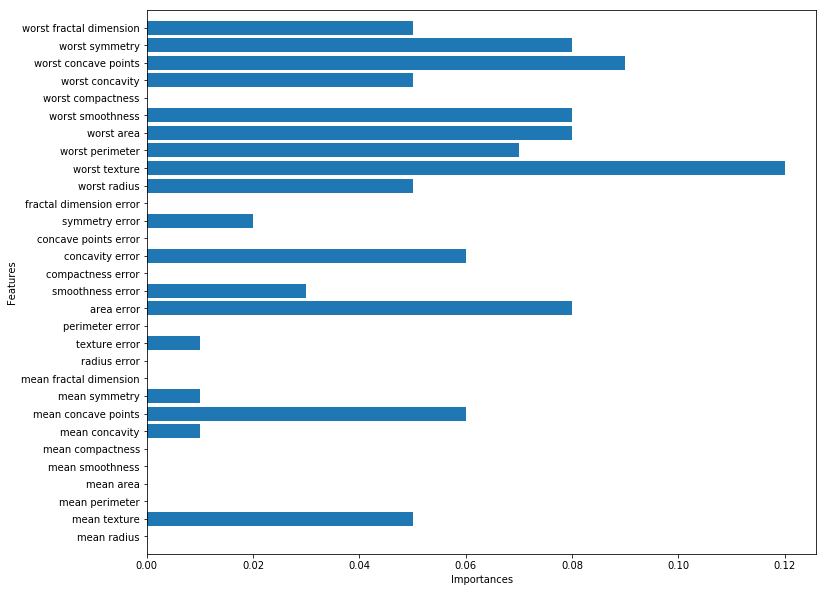

In [44]:
plot_feature_importances(gbrt)

In [45]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Train Data Accuracy : {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Data Accuracy : {:.3f}".format(gbrt.score(X_test, y_test)))

Train Data Accuracy : 0.988
Test Data Accuracy : 0.965


## Bagging, Extra Tree and Adaboost

In [46]:
from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

In [47]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=0)

### Bagging

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [49]:
print("Train Data Accuracy : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("Test Data Accuracy : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB Sample Accuracy : {:.3f}".format(bagging.oob_score_))

Train Data Accuracy : 0.962
Test Data Accuracy : 0.958
OOB Sample Accuracy : 0.948


In [50]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42, oob_score=True)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [51]:
print("Train Data Accuracy : {:.3f}".format(bagging.score(Xm_train, ym_train)))
print("Test Data Accuracy : {:.3f}".format(bagging.score(Xm_test, ym_test)))
print("OOB Sample Accuracy : {:.3f}".format(bagging.oob_score_))

Train Data Accuracy : 0.987
Test Data Accuracy : 0.880
OOB Sample Accuracy : 0.840


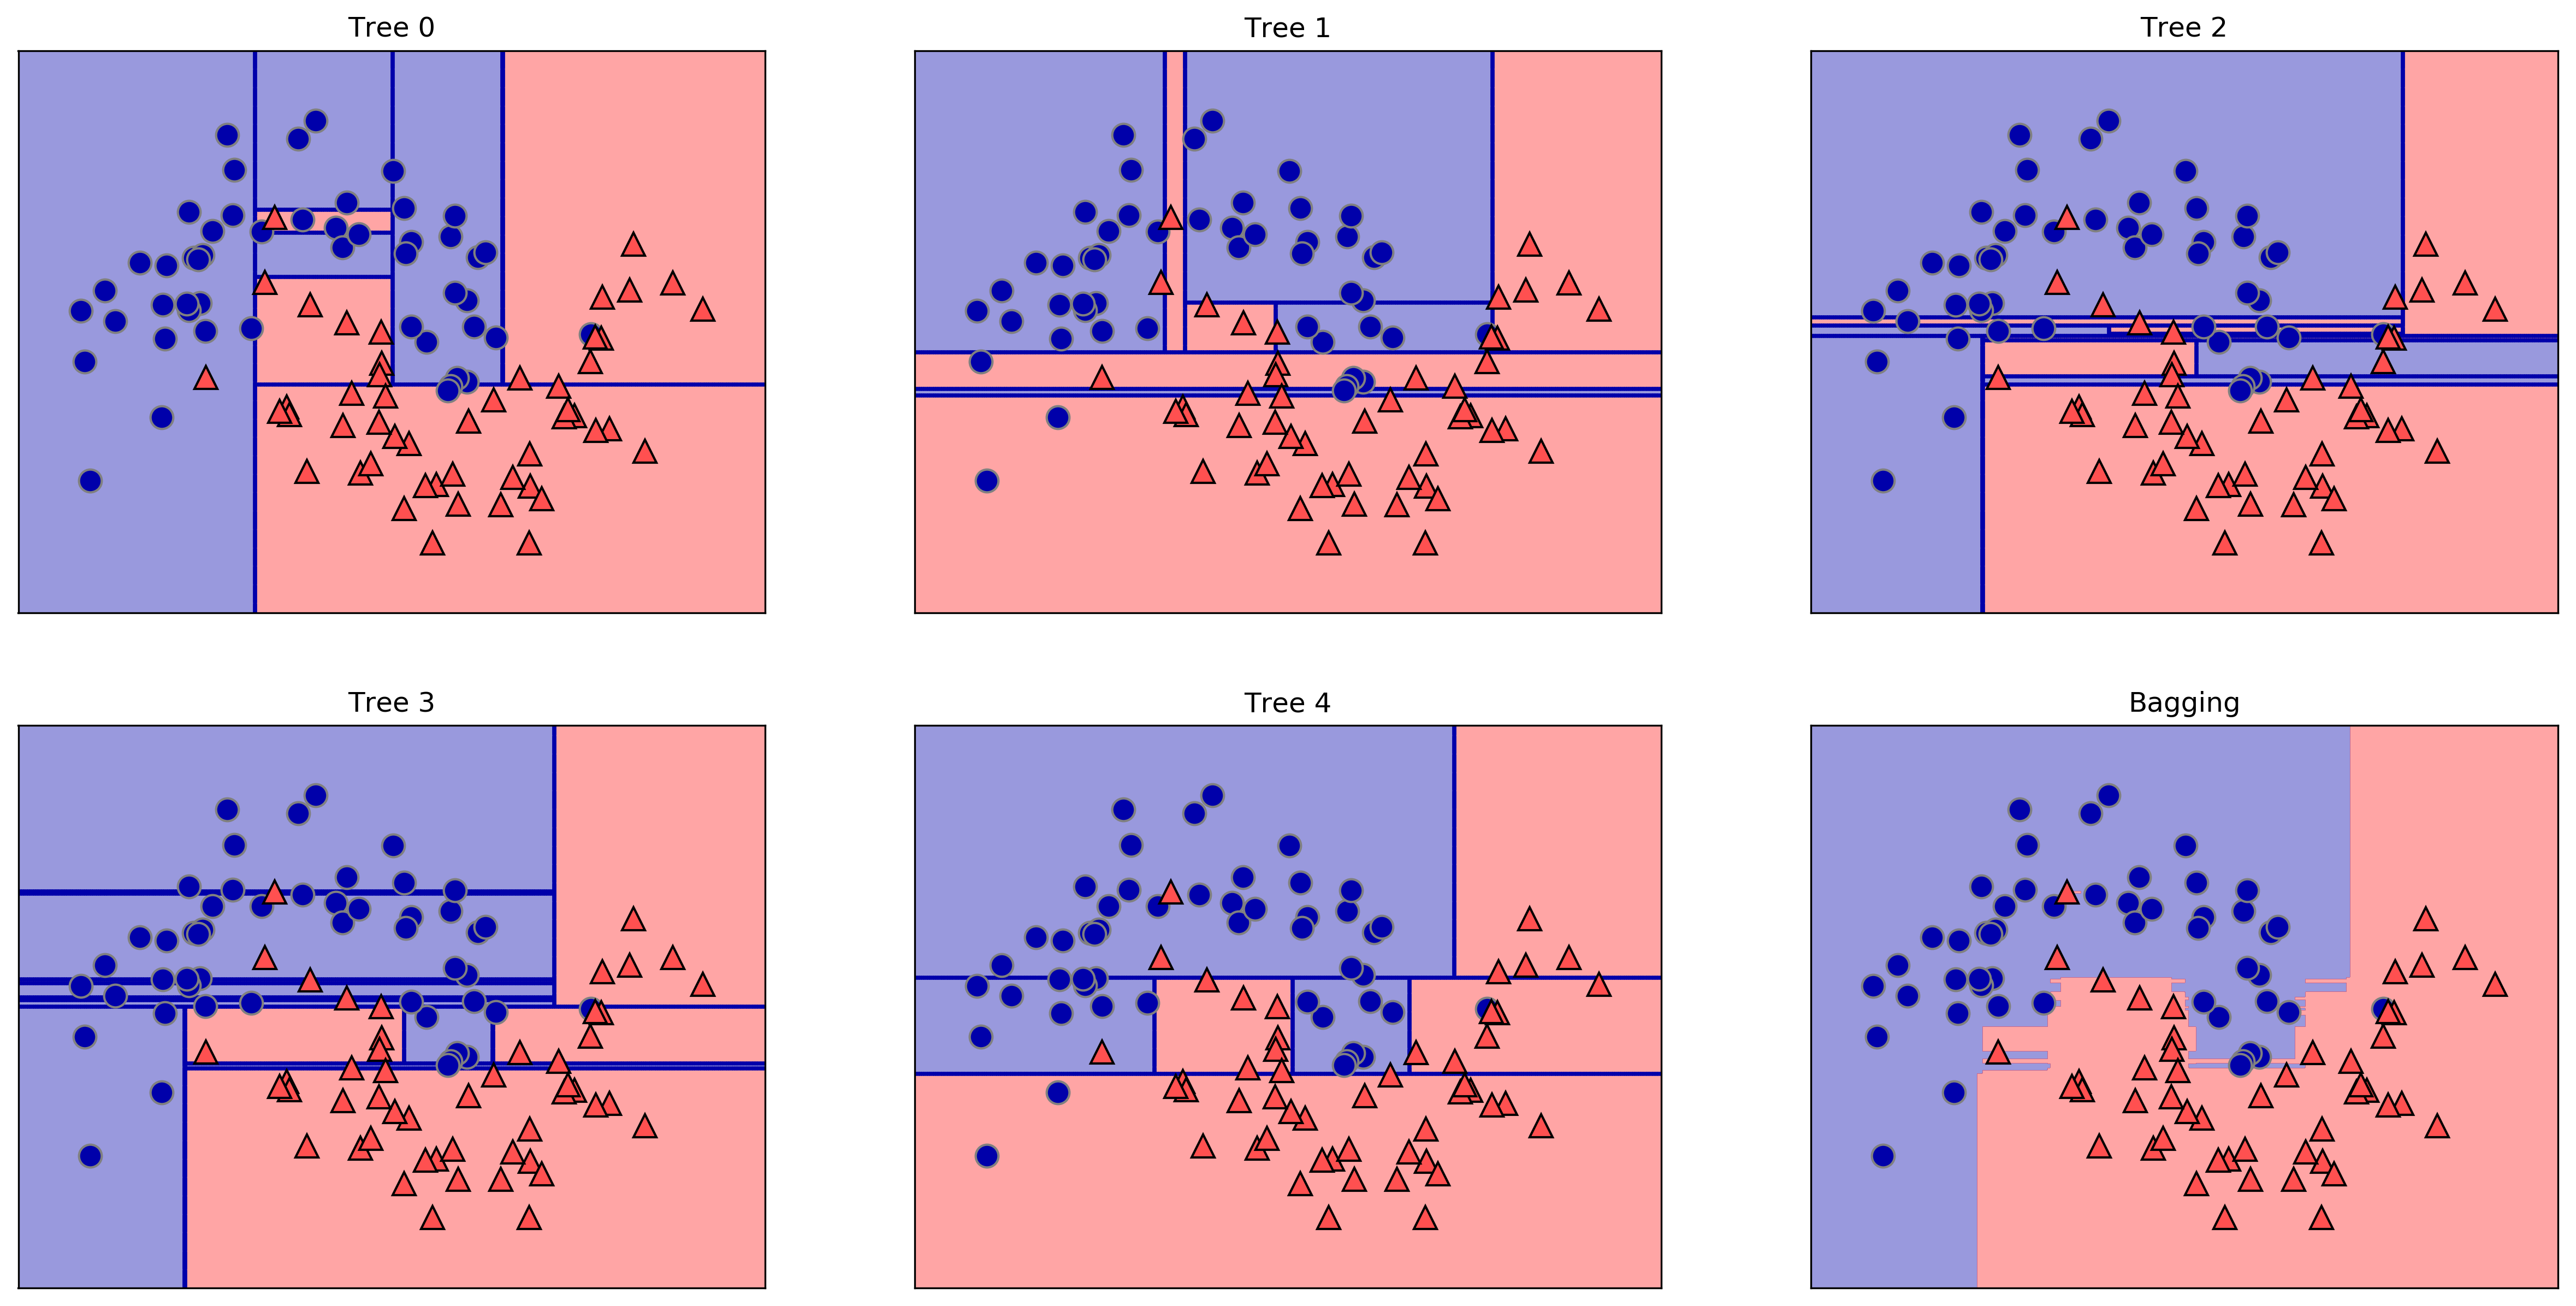

In [52]:
fig, axs = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axs.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axs[-1,-1], alpha=.4)
axs[-1,-1].set_title('Bagging')
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

In [53]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, n_jobs=-1, random_state=42, oob_score=True)
bagging.fit(Xc_train, yc_train)

print("Train Data Accuracy : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("Test Data Accuracy : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB Sample Accuracy : {:.3f}".format(bagging.oob_score_))

Train Data Accuracy : 1.000
Test Data Accuracy : 0.965
OOB Sample Accuracy : 0.951


### Xtree

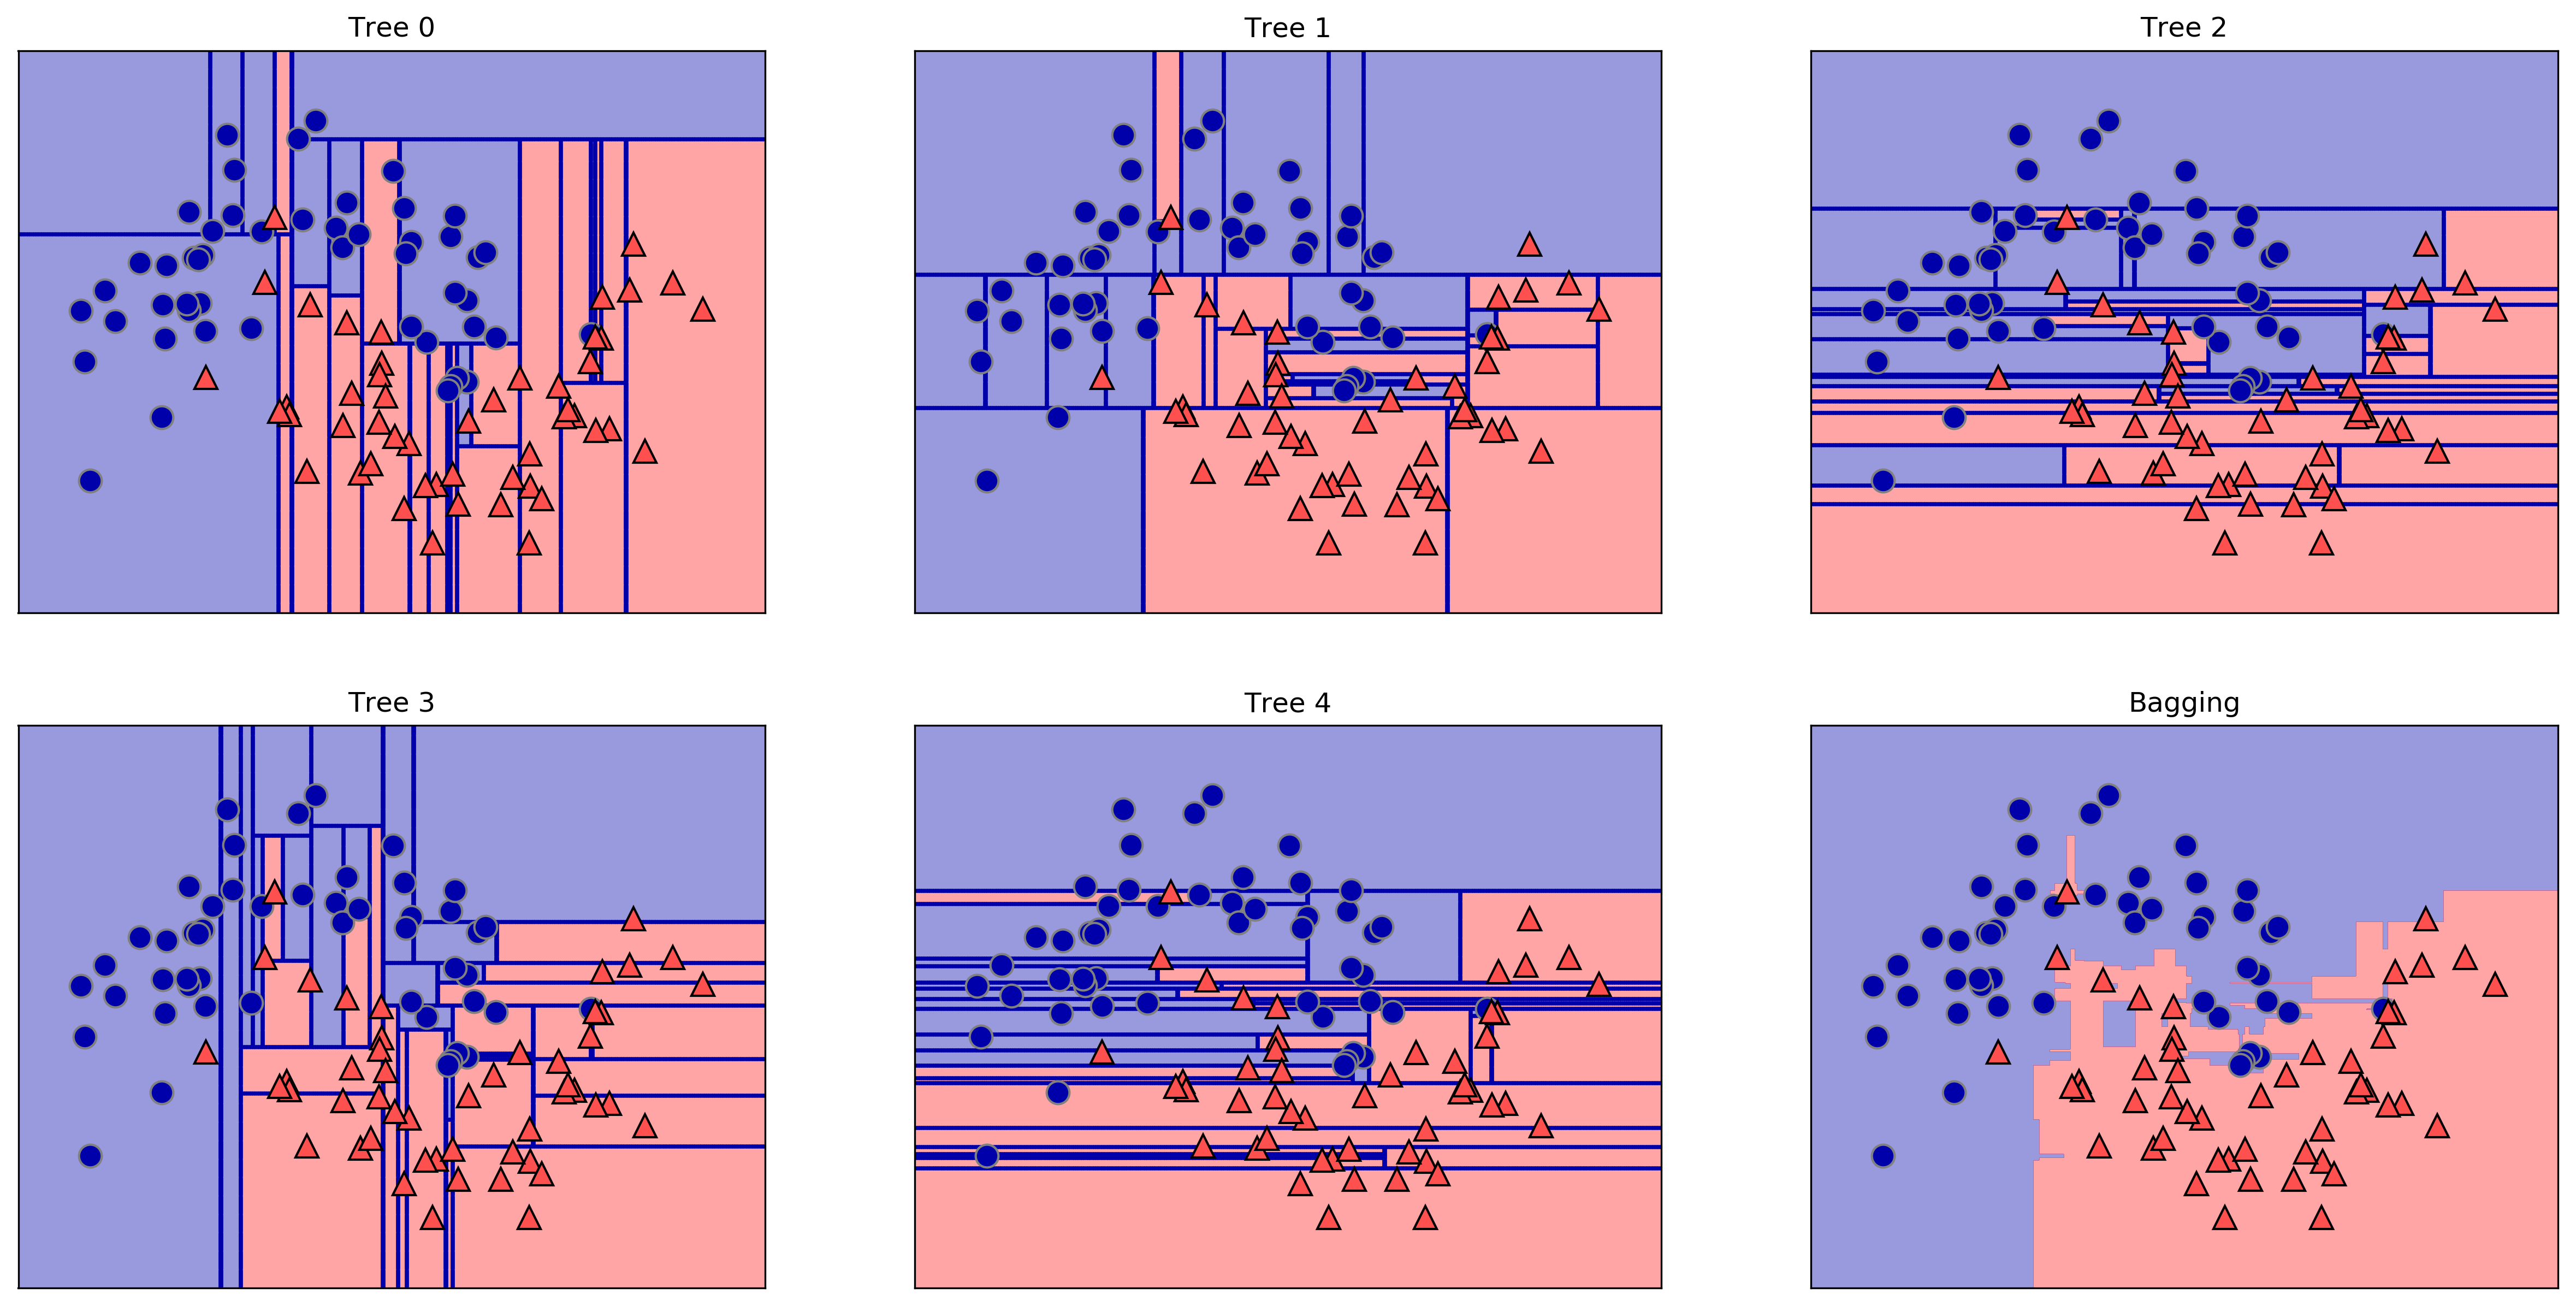

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

fig, axs = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axs.ravel(), xtree.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axs[-1,-1], alpha=.4)
axs[-1,-1].set_title('Bagging')
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

In [55]:
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

print("Train Data Accuracy : {:.3f}".format(xtree.score(Xc_train, yc_train)))
print("Test Data Accuracy : {:.3f}".format(xtree.score(Xc_test, yc_test)))

Train Data Accuracy : 1.000
Test Data Accuracy : 0.972


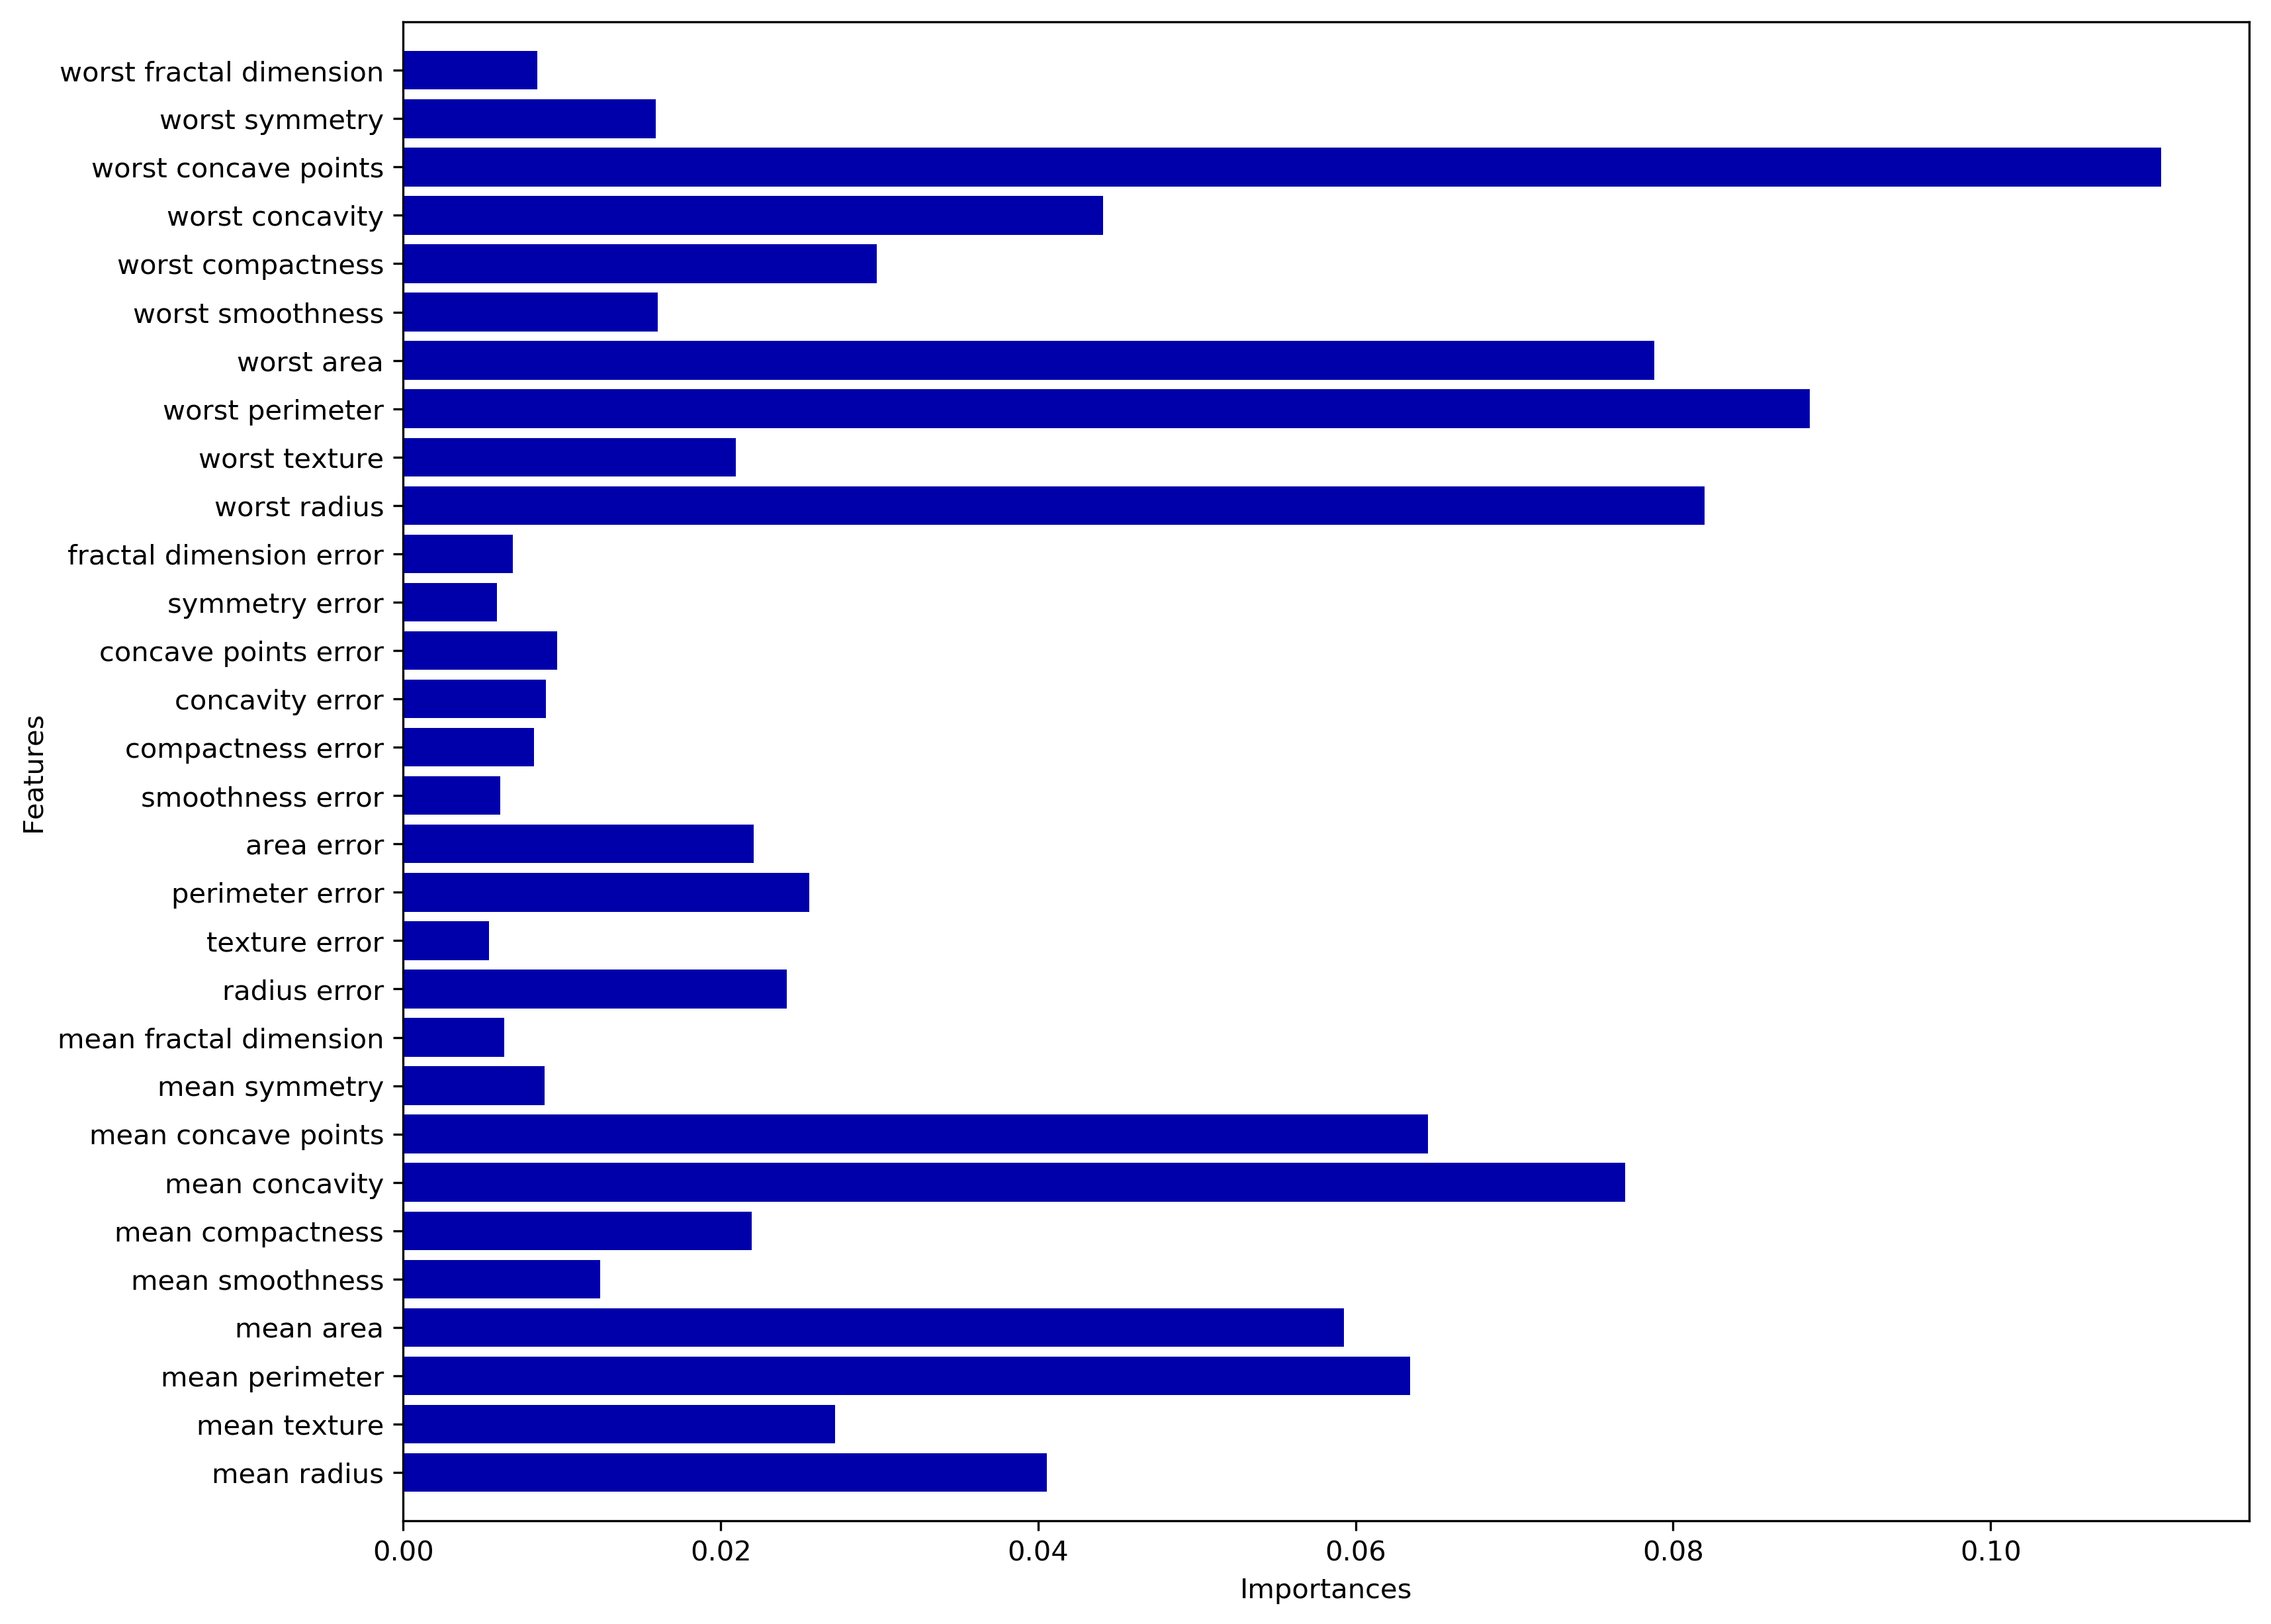

In [56]:
plot_feature_importances(xtree)

### Adaboost

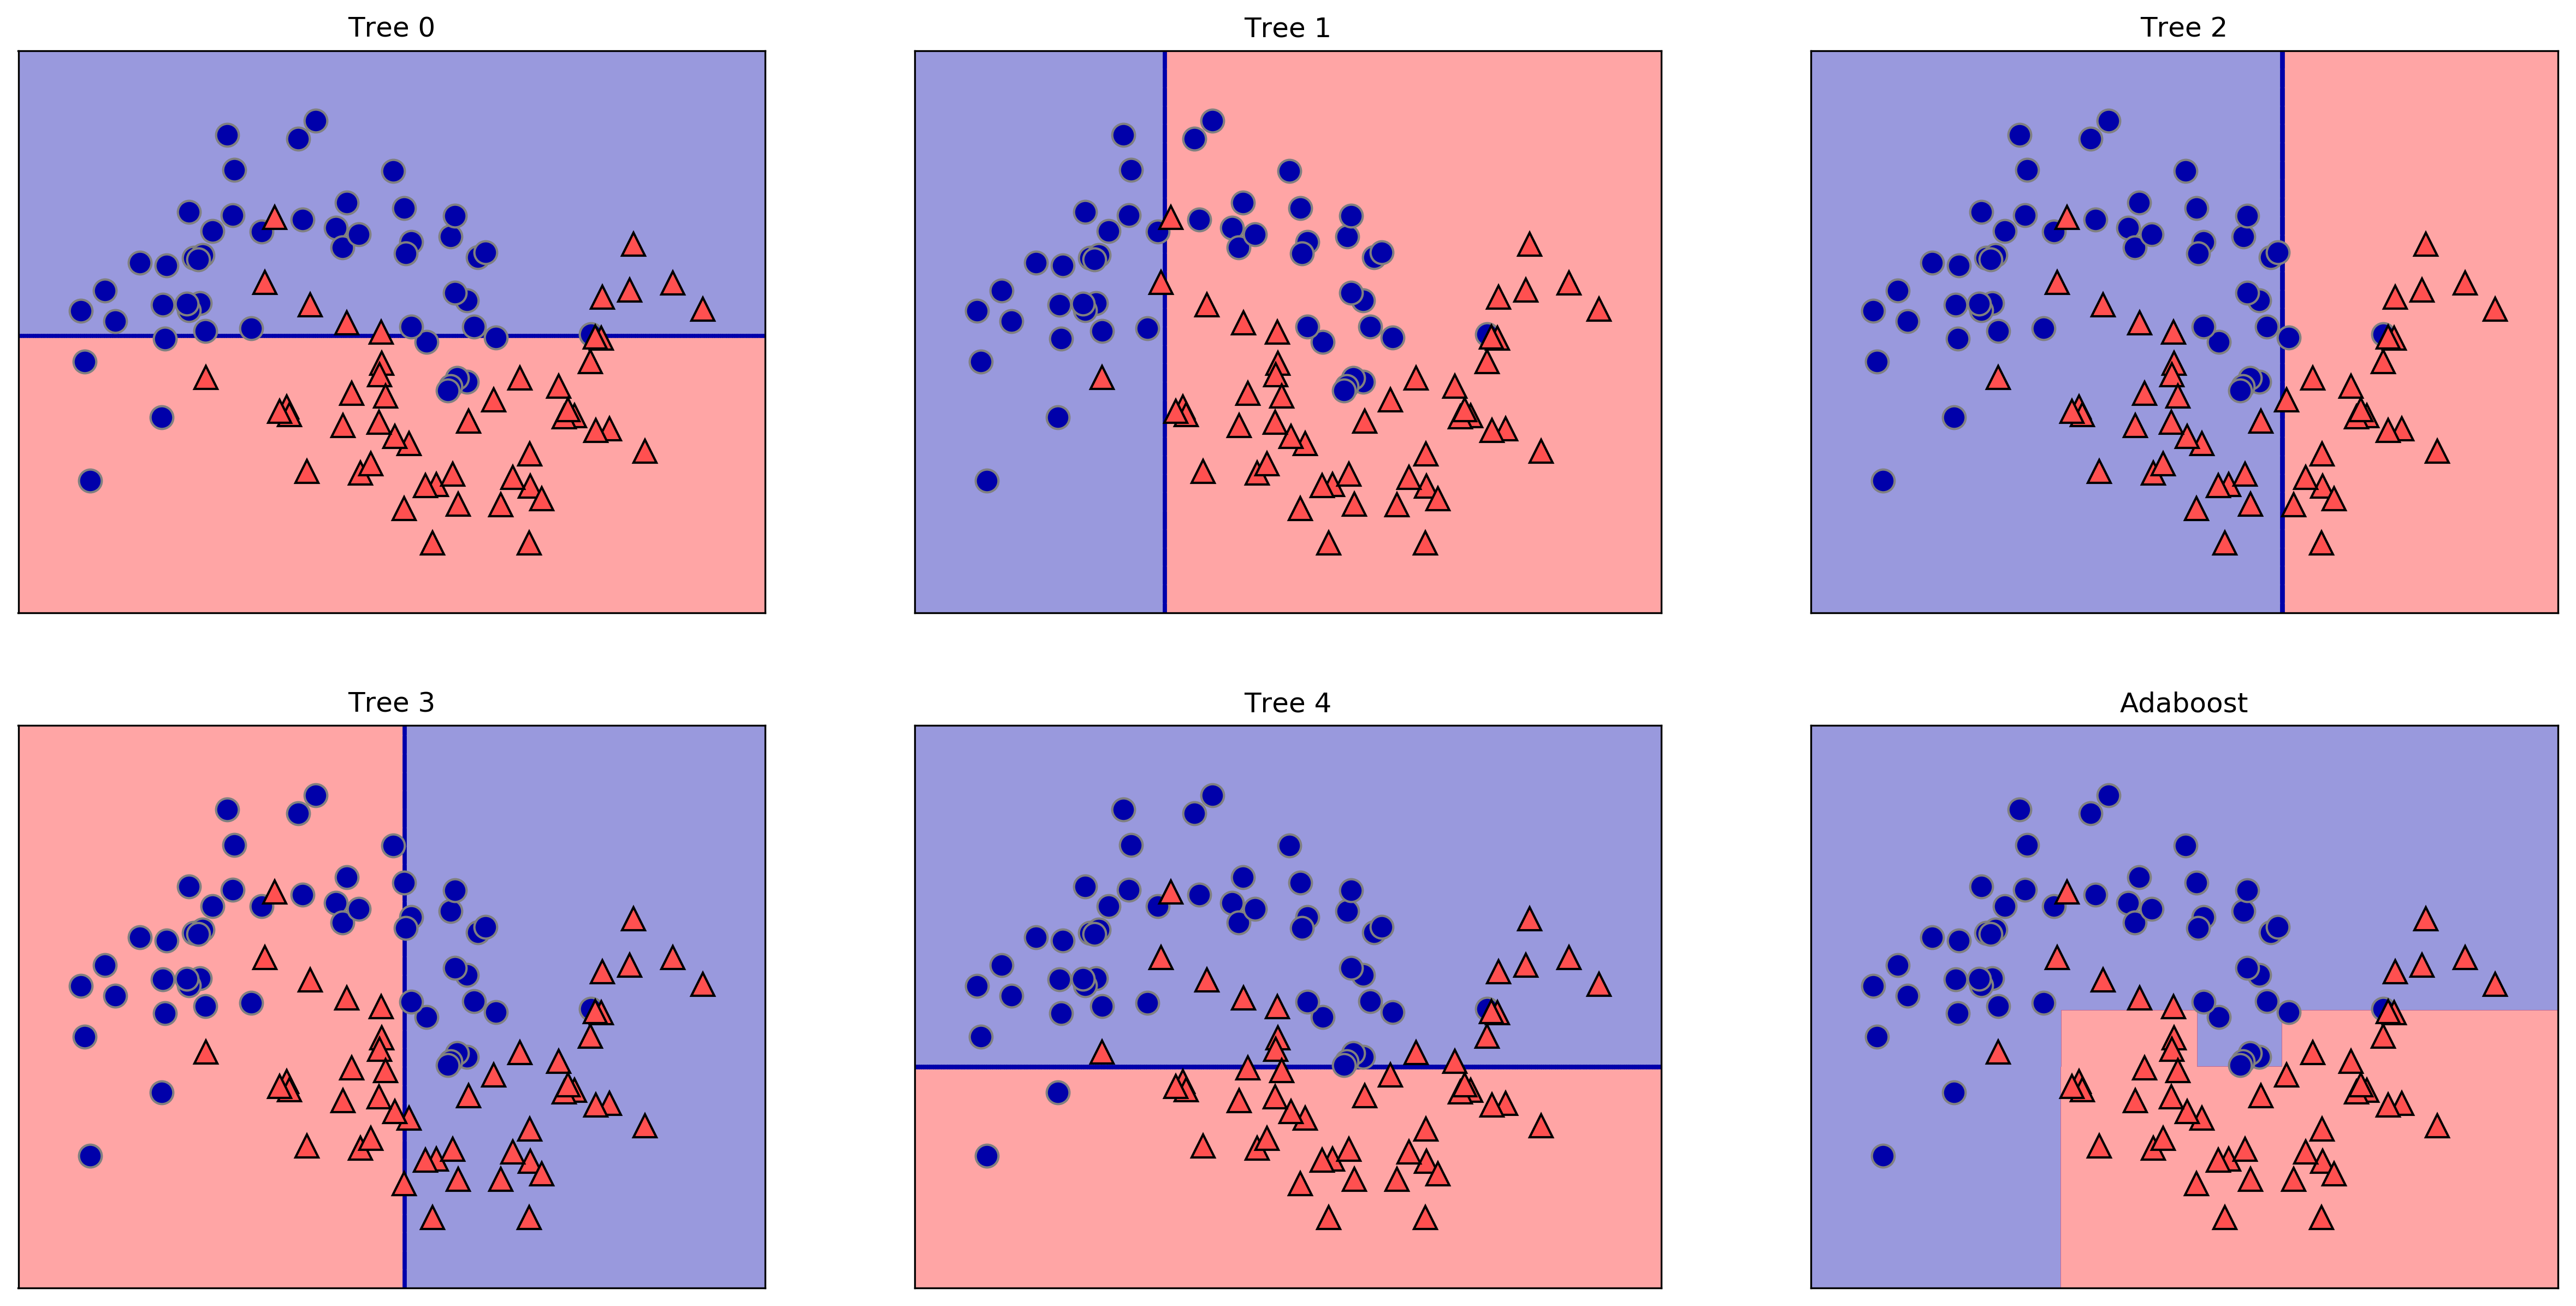

In [57]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

fig, axs = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axs.ravel(), ada.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axs[-1,-1], alpha=.4)
axs[-1,-1].set_title('Adaboost')
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

In [58]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

print("Train Data Accuracy : {:.3f}".format(ada.score(Xc_train, yc_train)))
print("Test Data Accuracy : {:.3f}".format(ada.score(Xc_test, yc_test)))

Train Data Accuracy : 1.000
Test Data Accuracy : 0.986


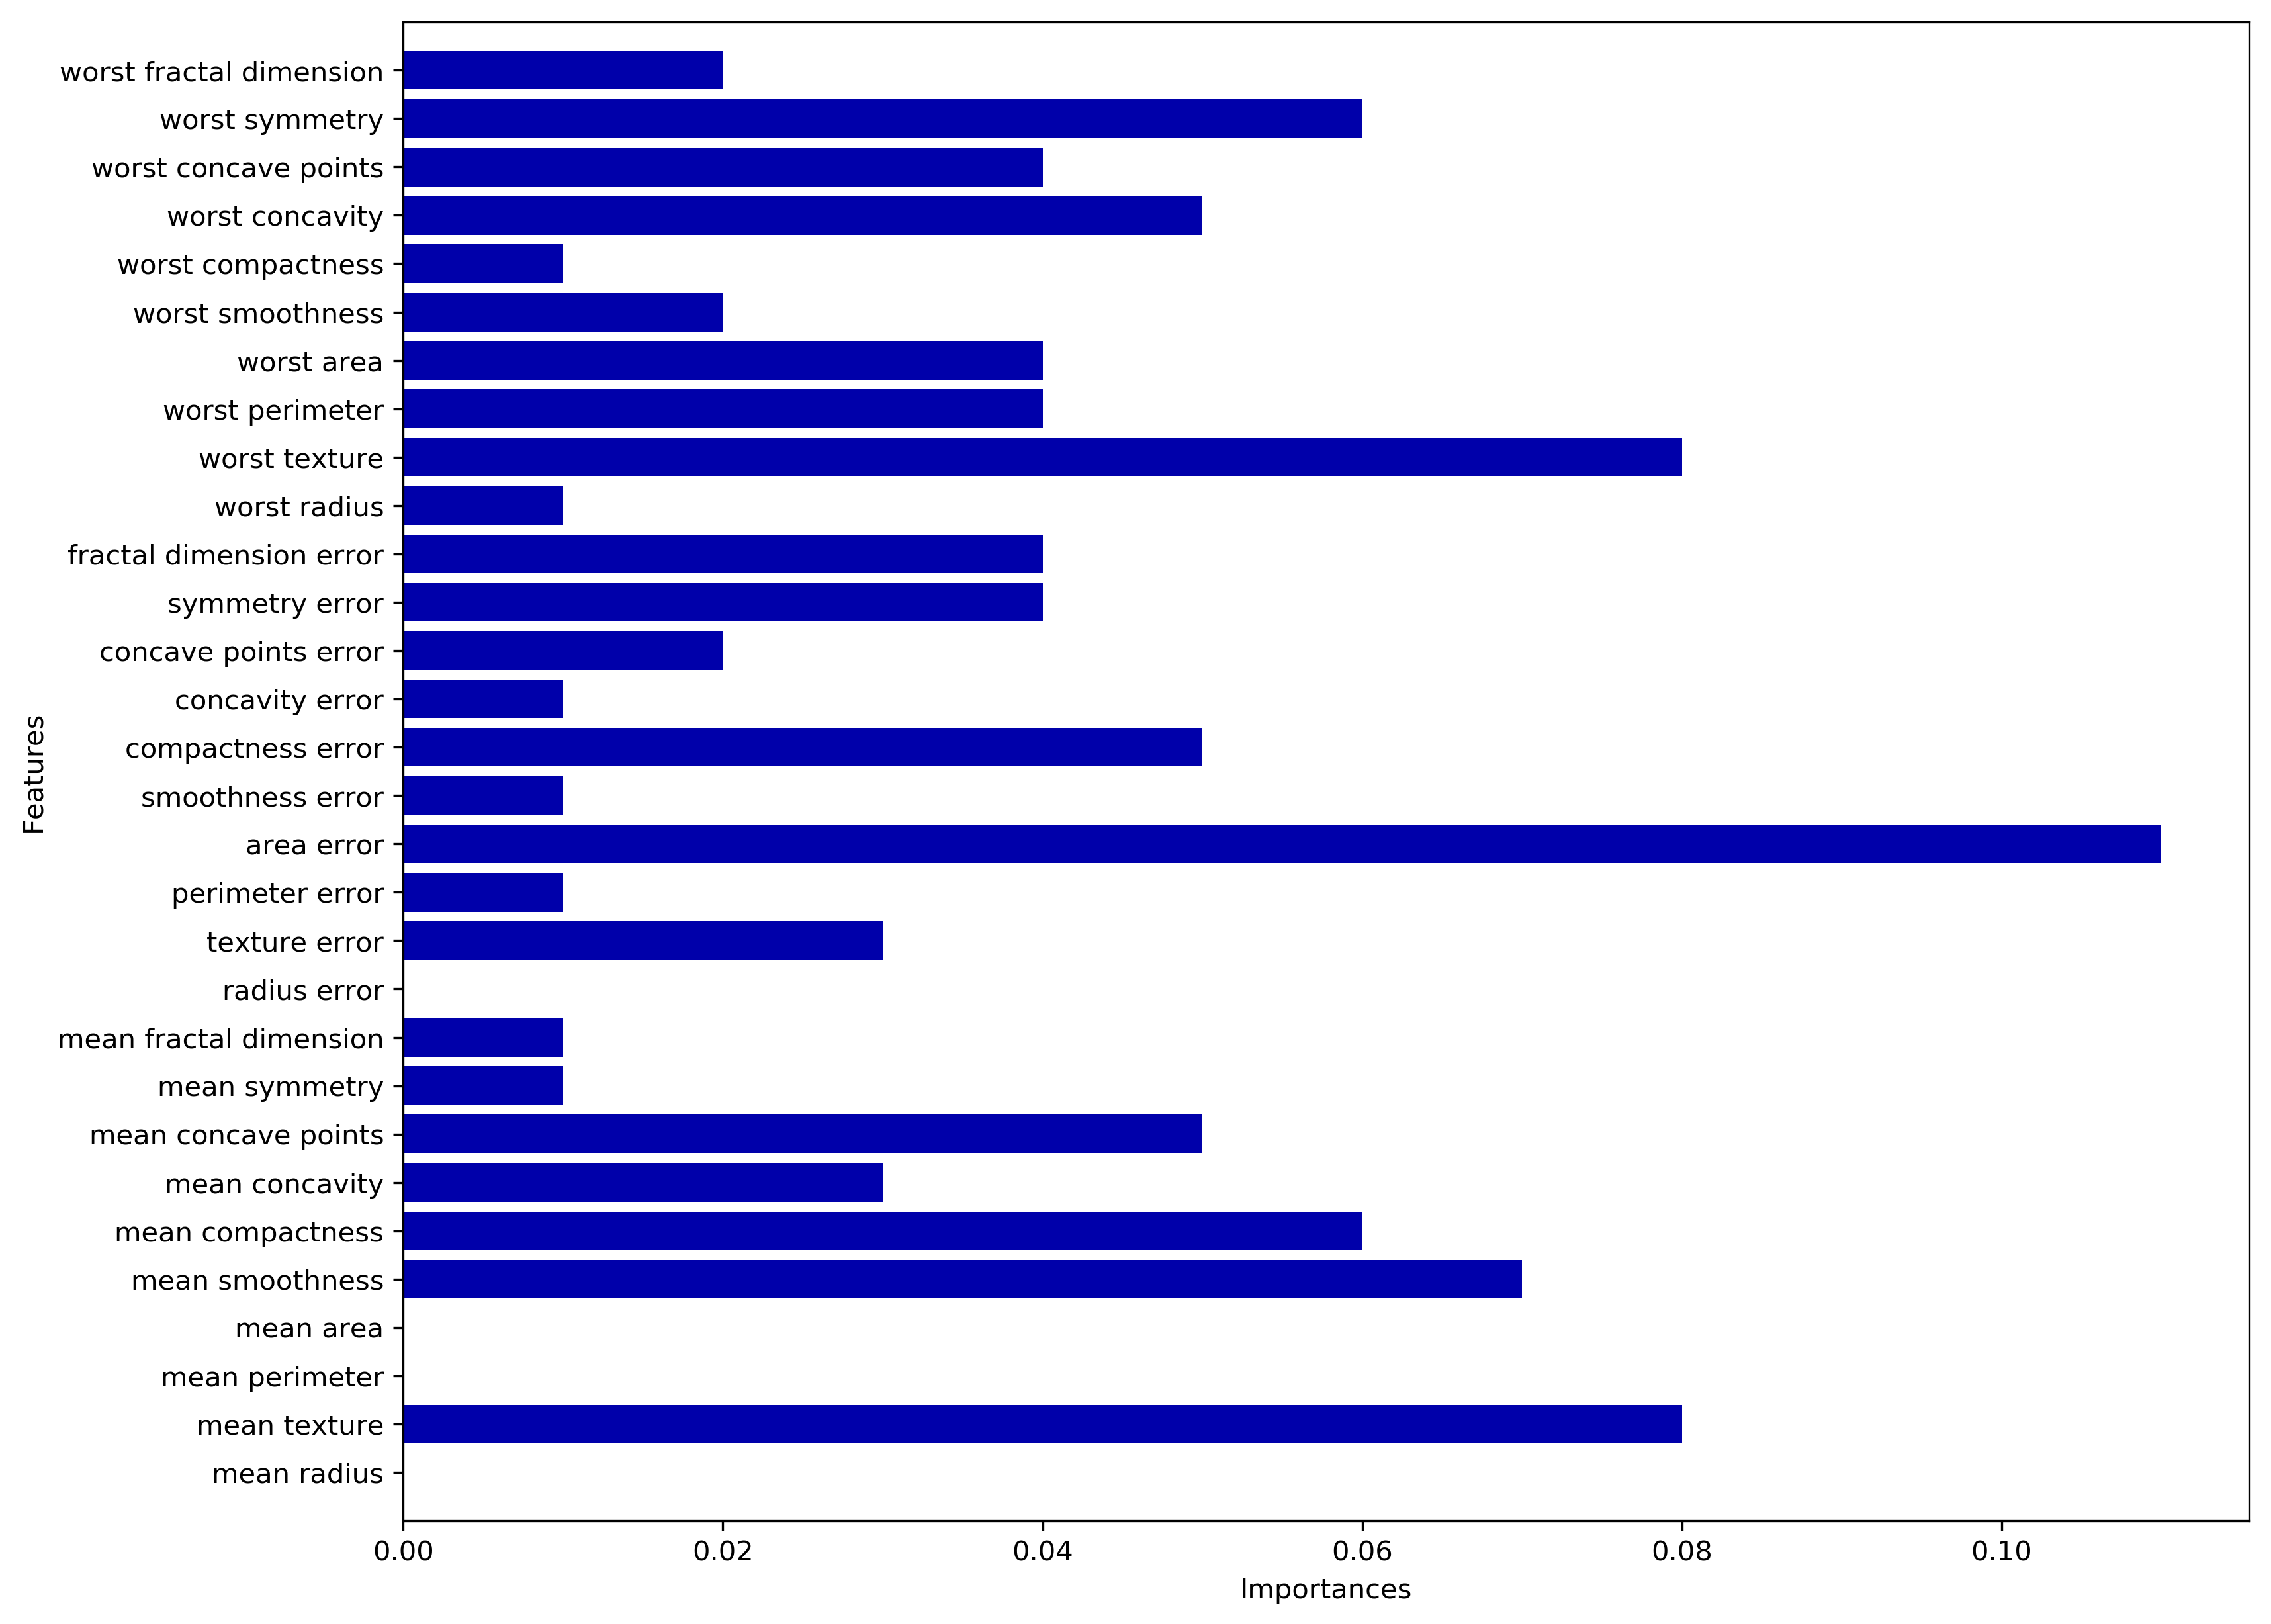

In [59]:
plot_feature_importances(ada)

## Kernelized Support Vector Machine

In [60]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

Text(0,0.5,'Feature 1')

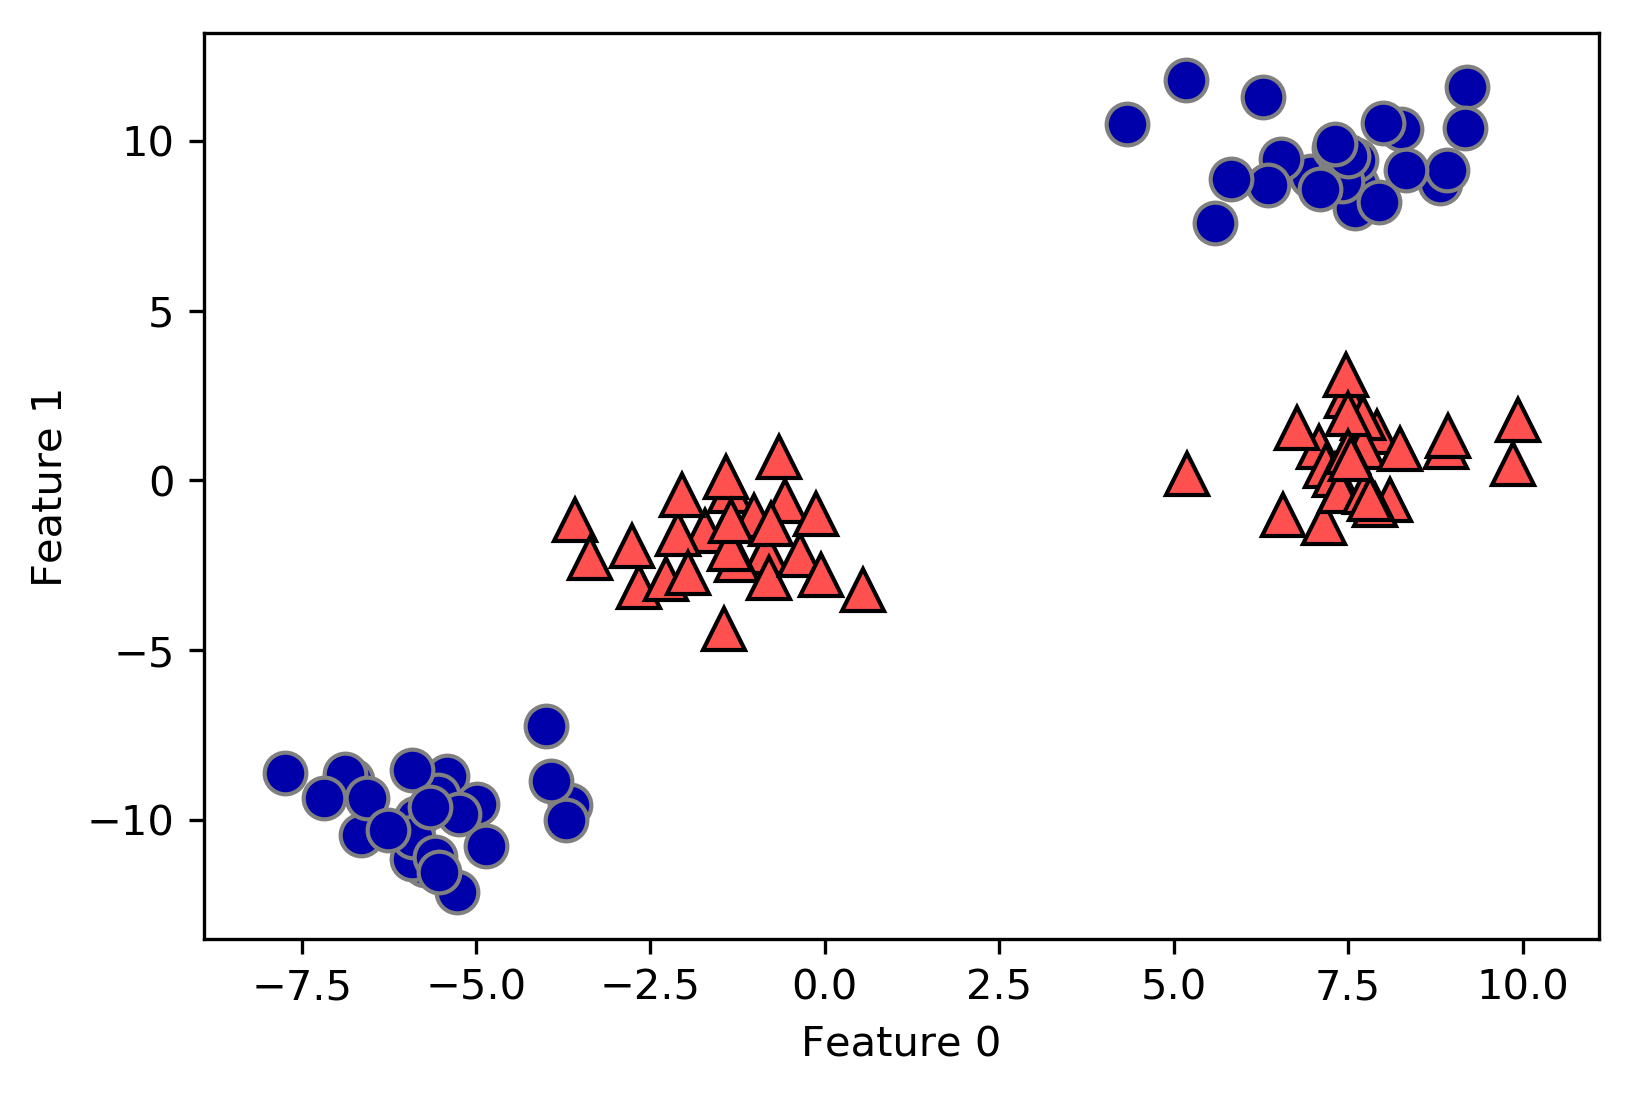

In [61]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

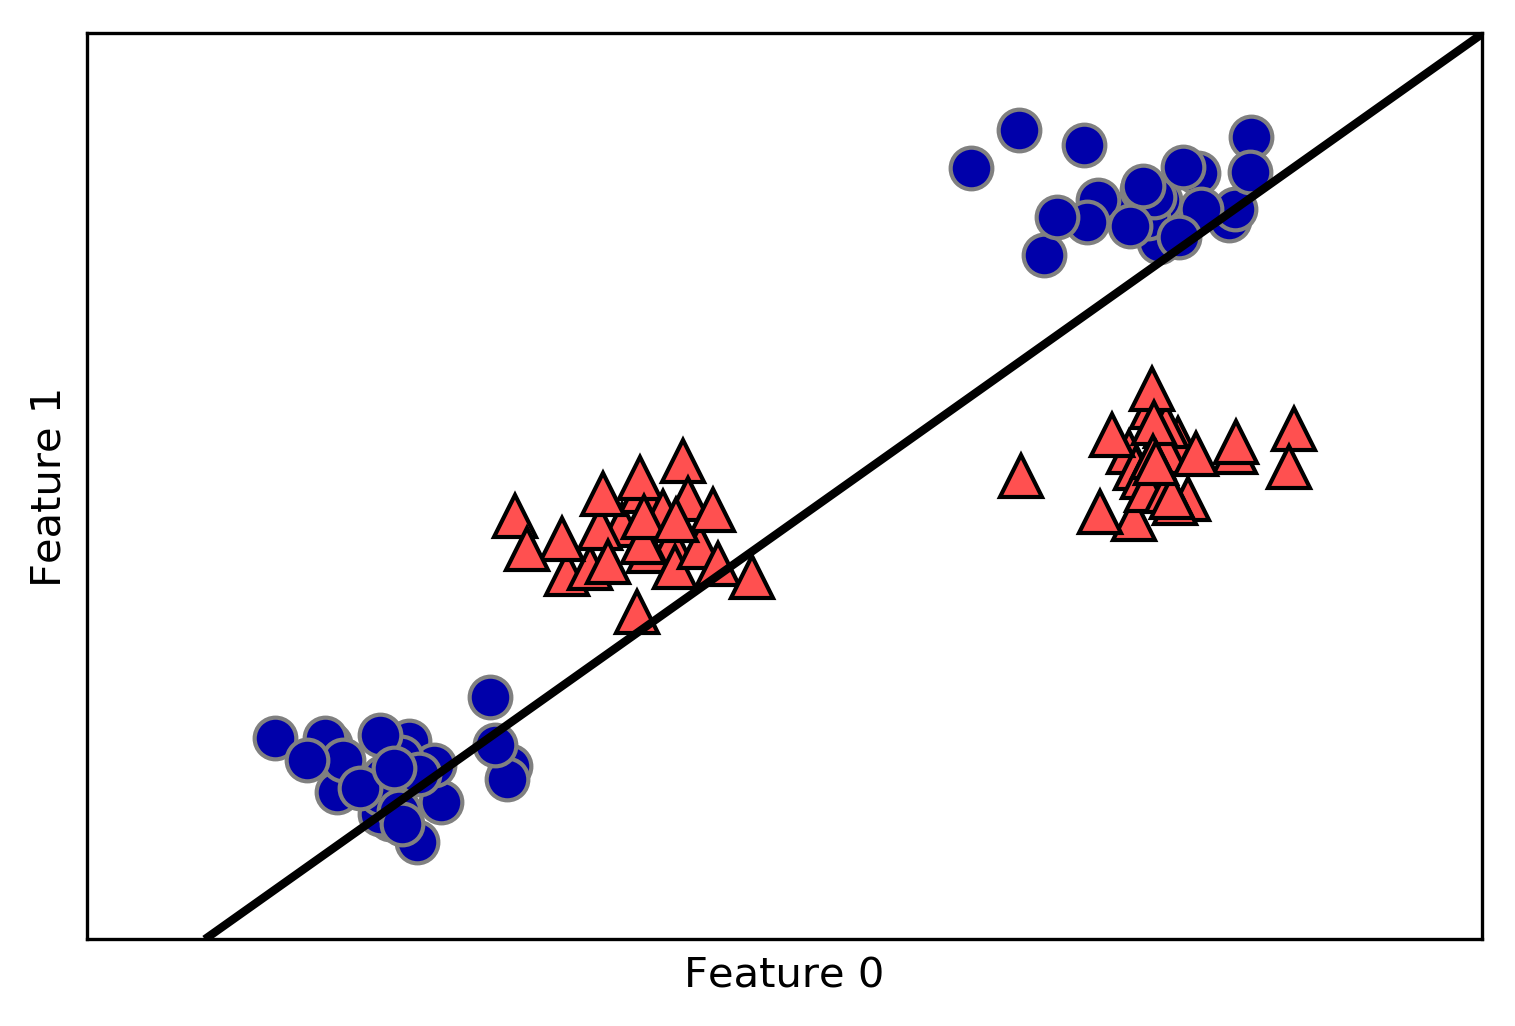

In [62]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0.5,0,'Feature 1 ** 2')

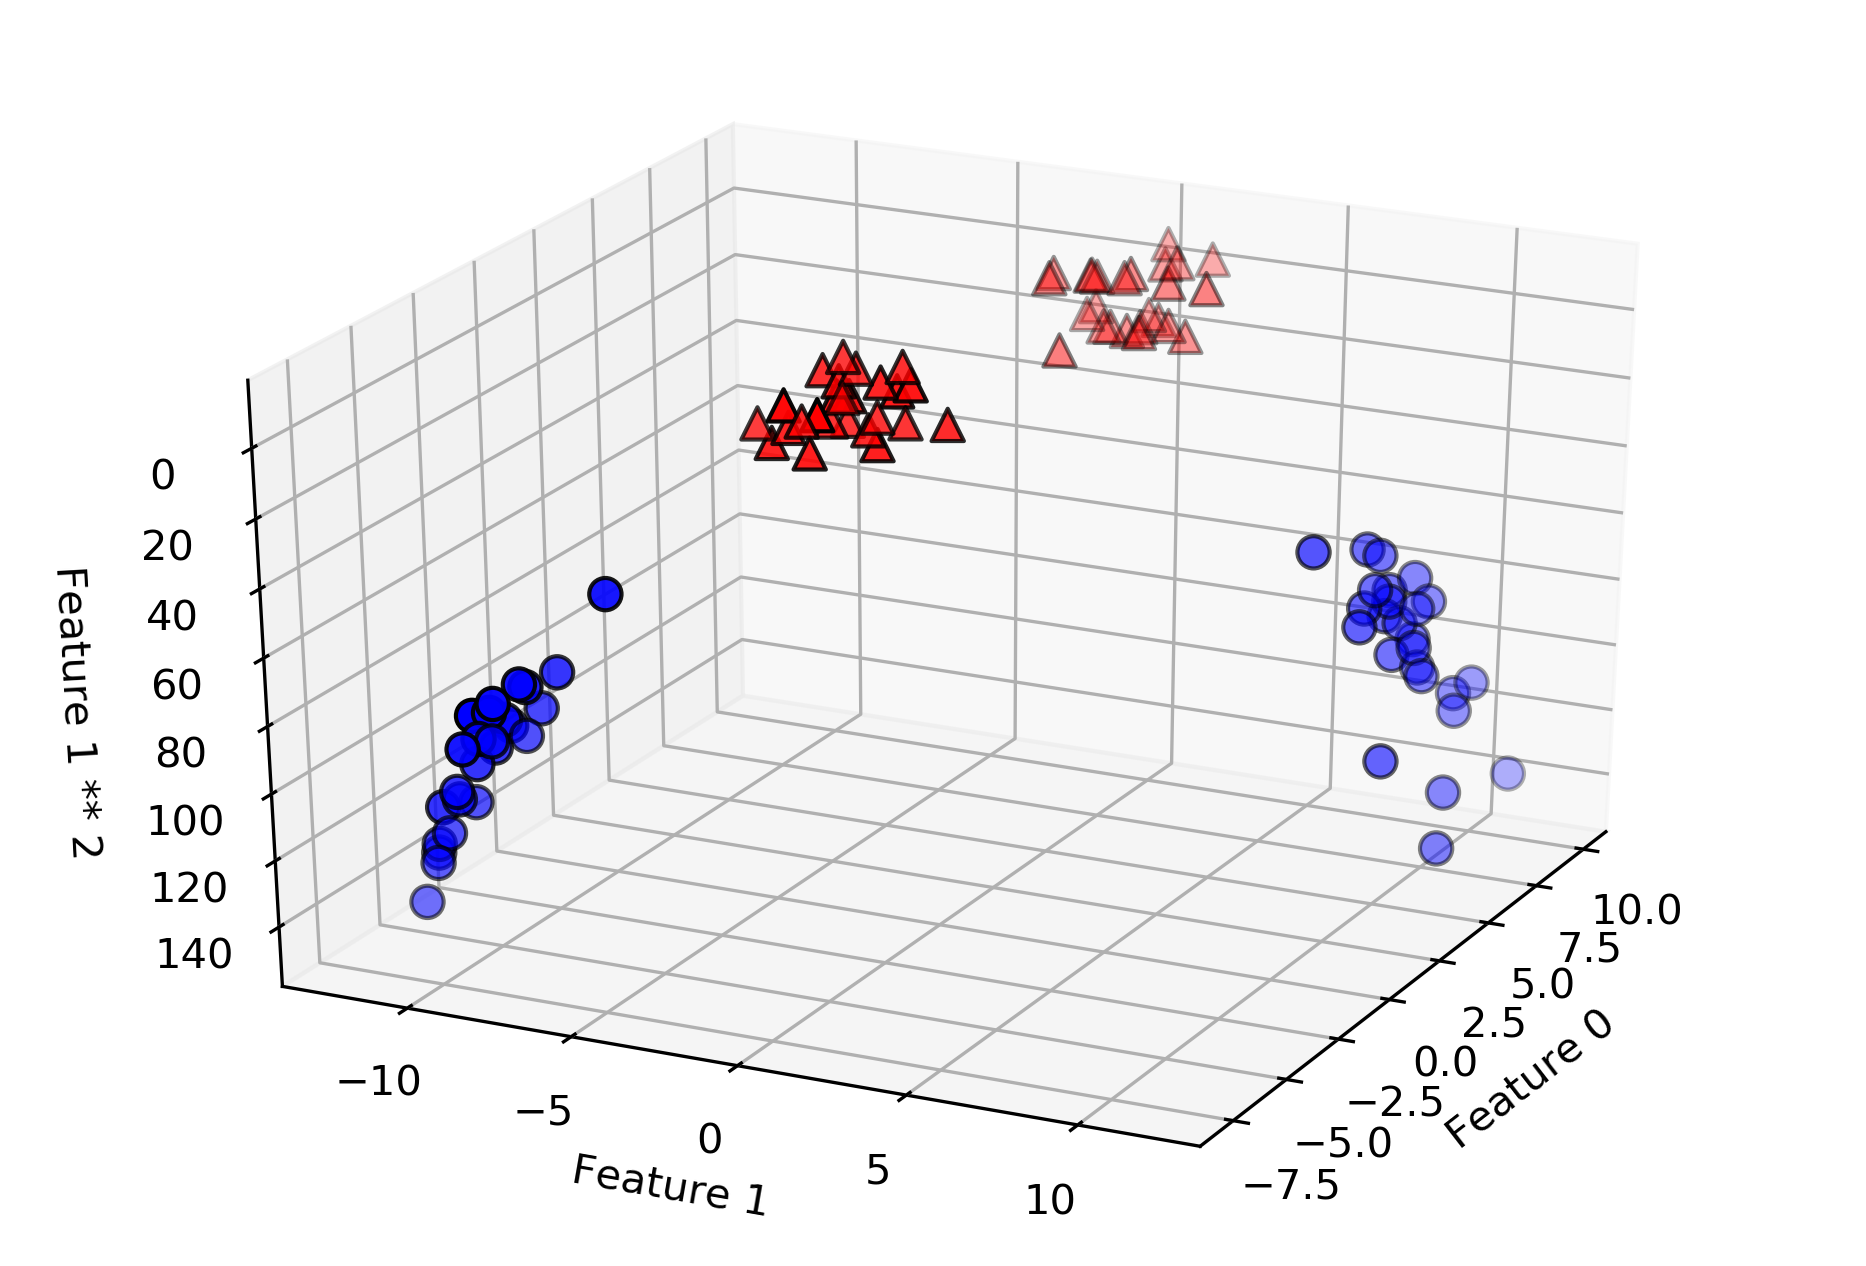

In [63]:
X_new = np.hstack([X, X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

#3d graph
ax = Axes3D(figure, elev=-152, azim=-26)
mask=y==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[mask,~2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

Text(0.5,0,'Feature 1 ** 2')

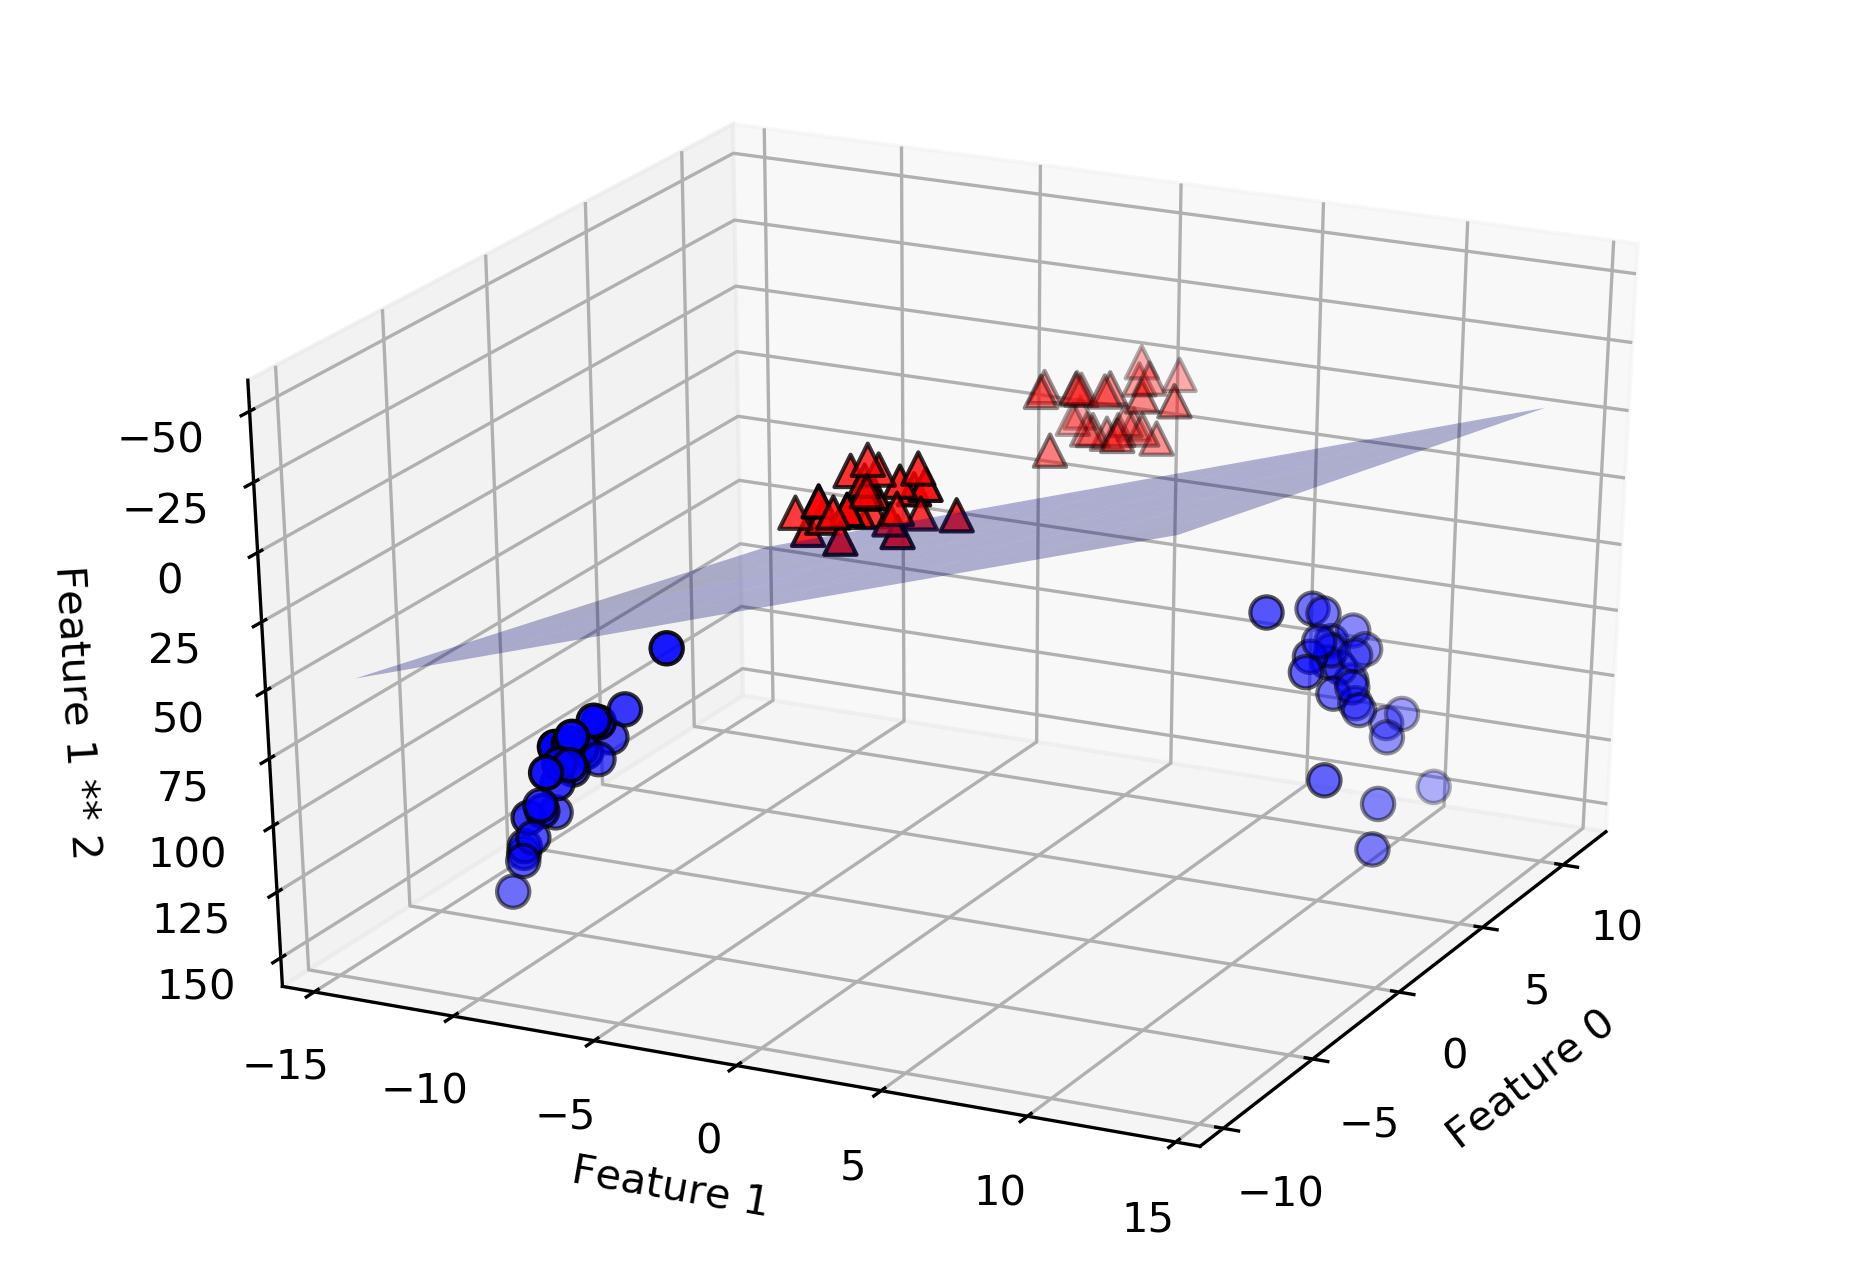

In [64]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[mask,0].min() - 2,  X_new[mask,0].max() + 2, 50)
yy = np.linspace(X_new[mask,1].min() - 2,  X_new[mask,1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=.3)

ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[mask,~2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

Text(0,0.5,'Feature 1')

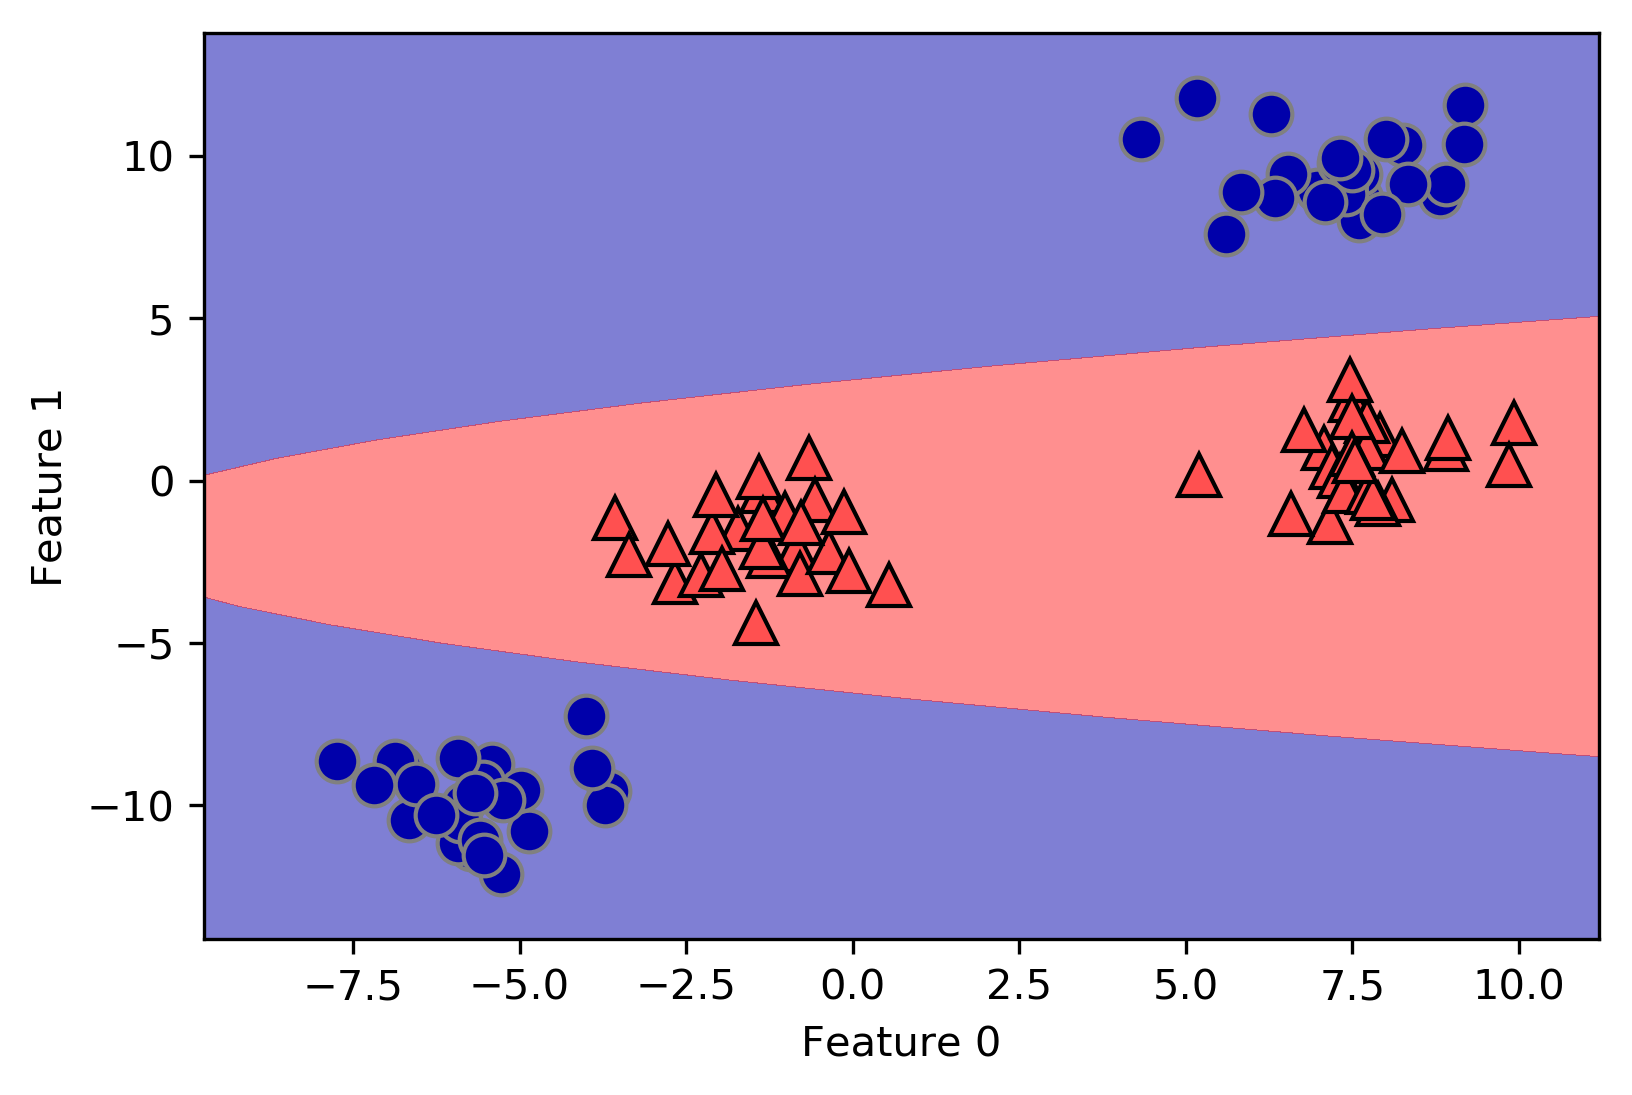

In [65]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(),0,dec.max()], cmap=mglearn.cm2, alpha=.5)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0,0.5,'Feature 1')

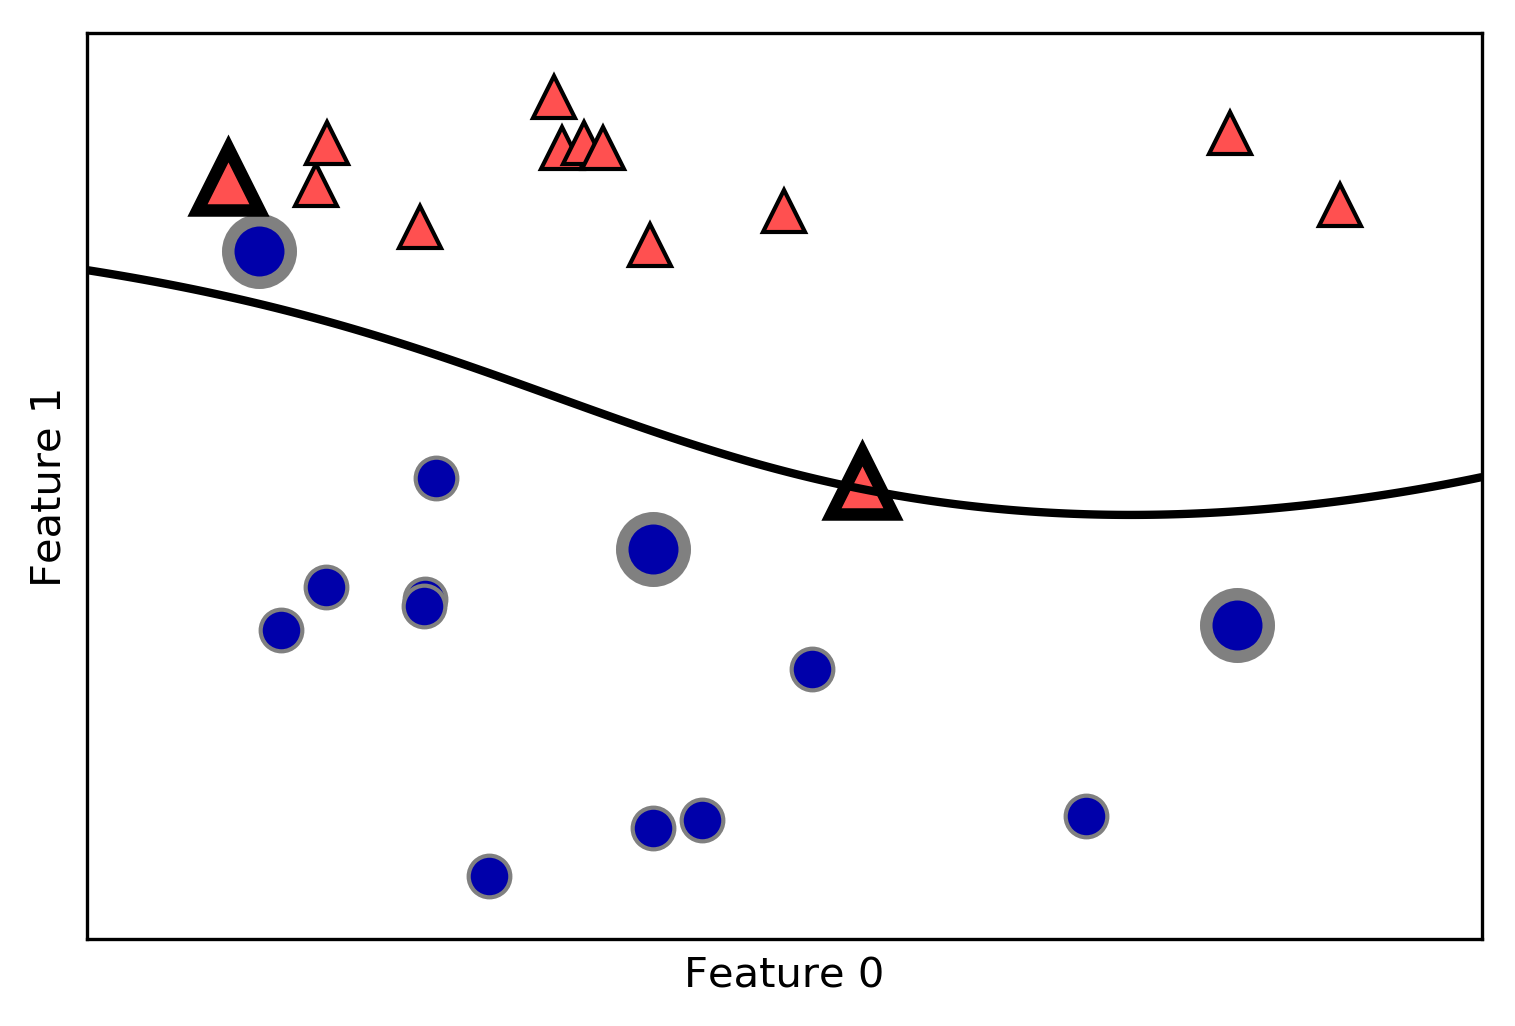

In [66]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

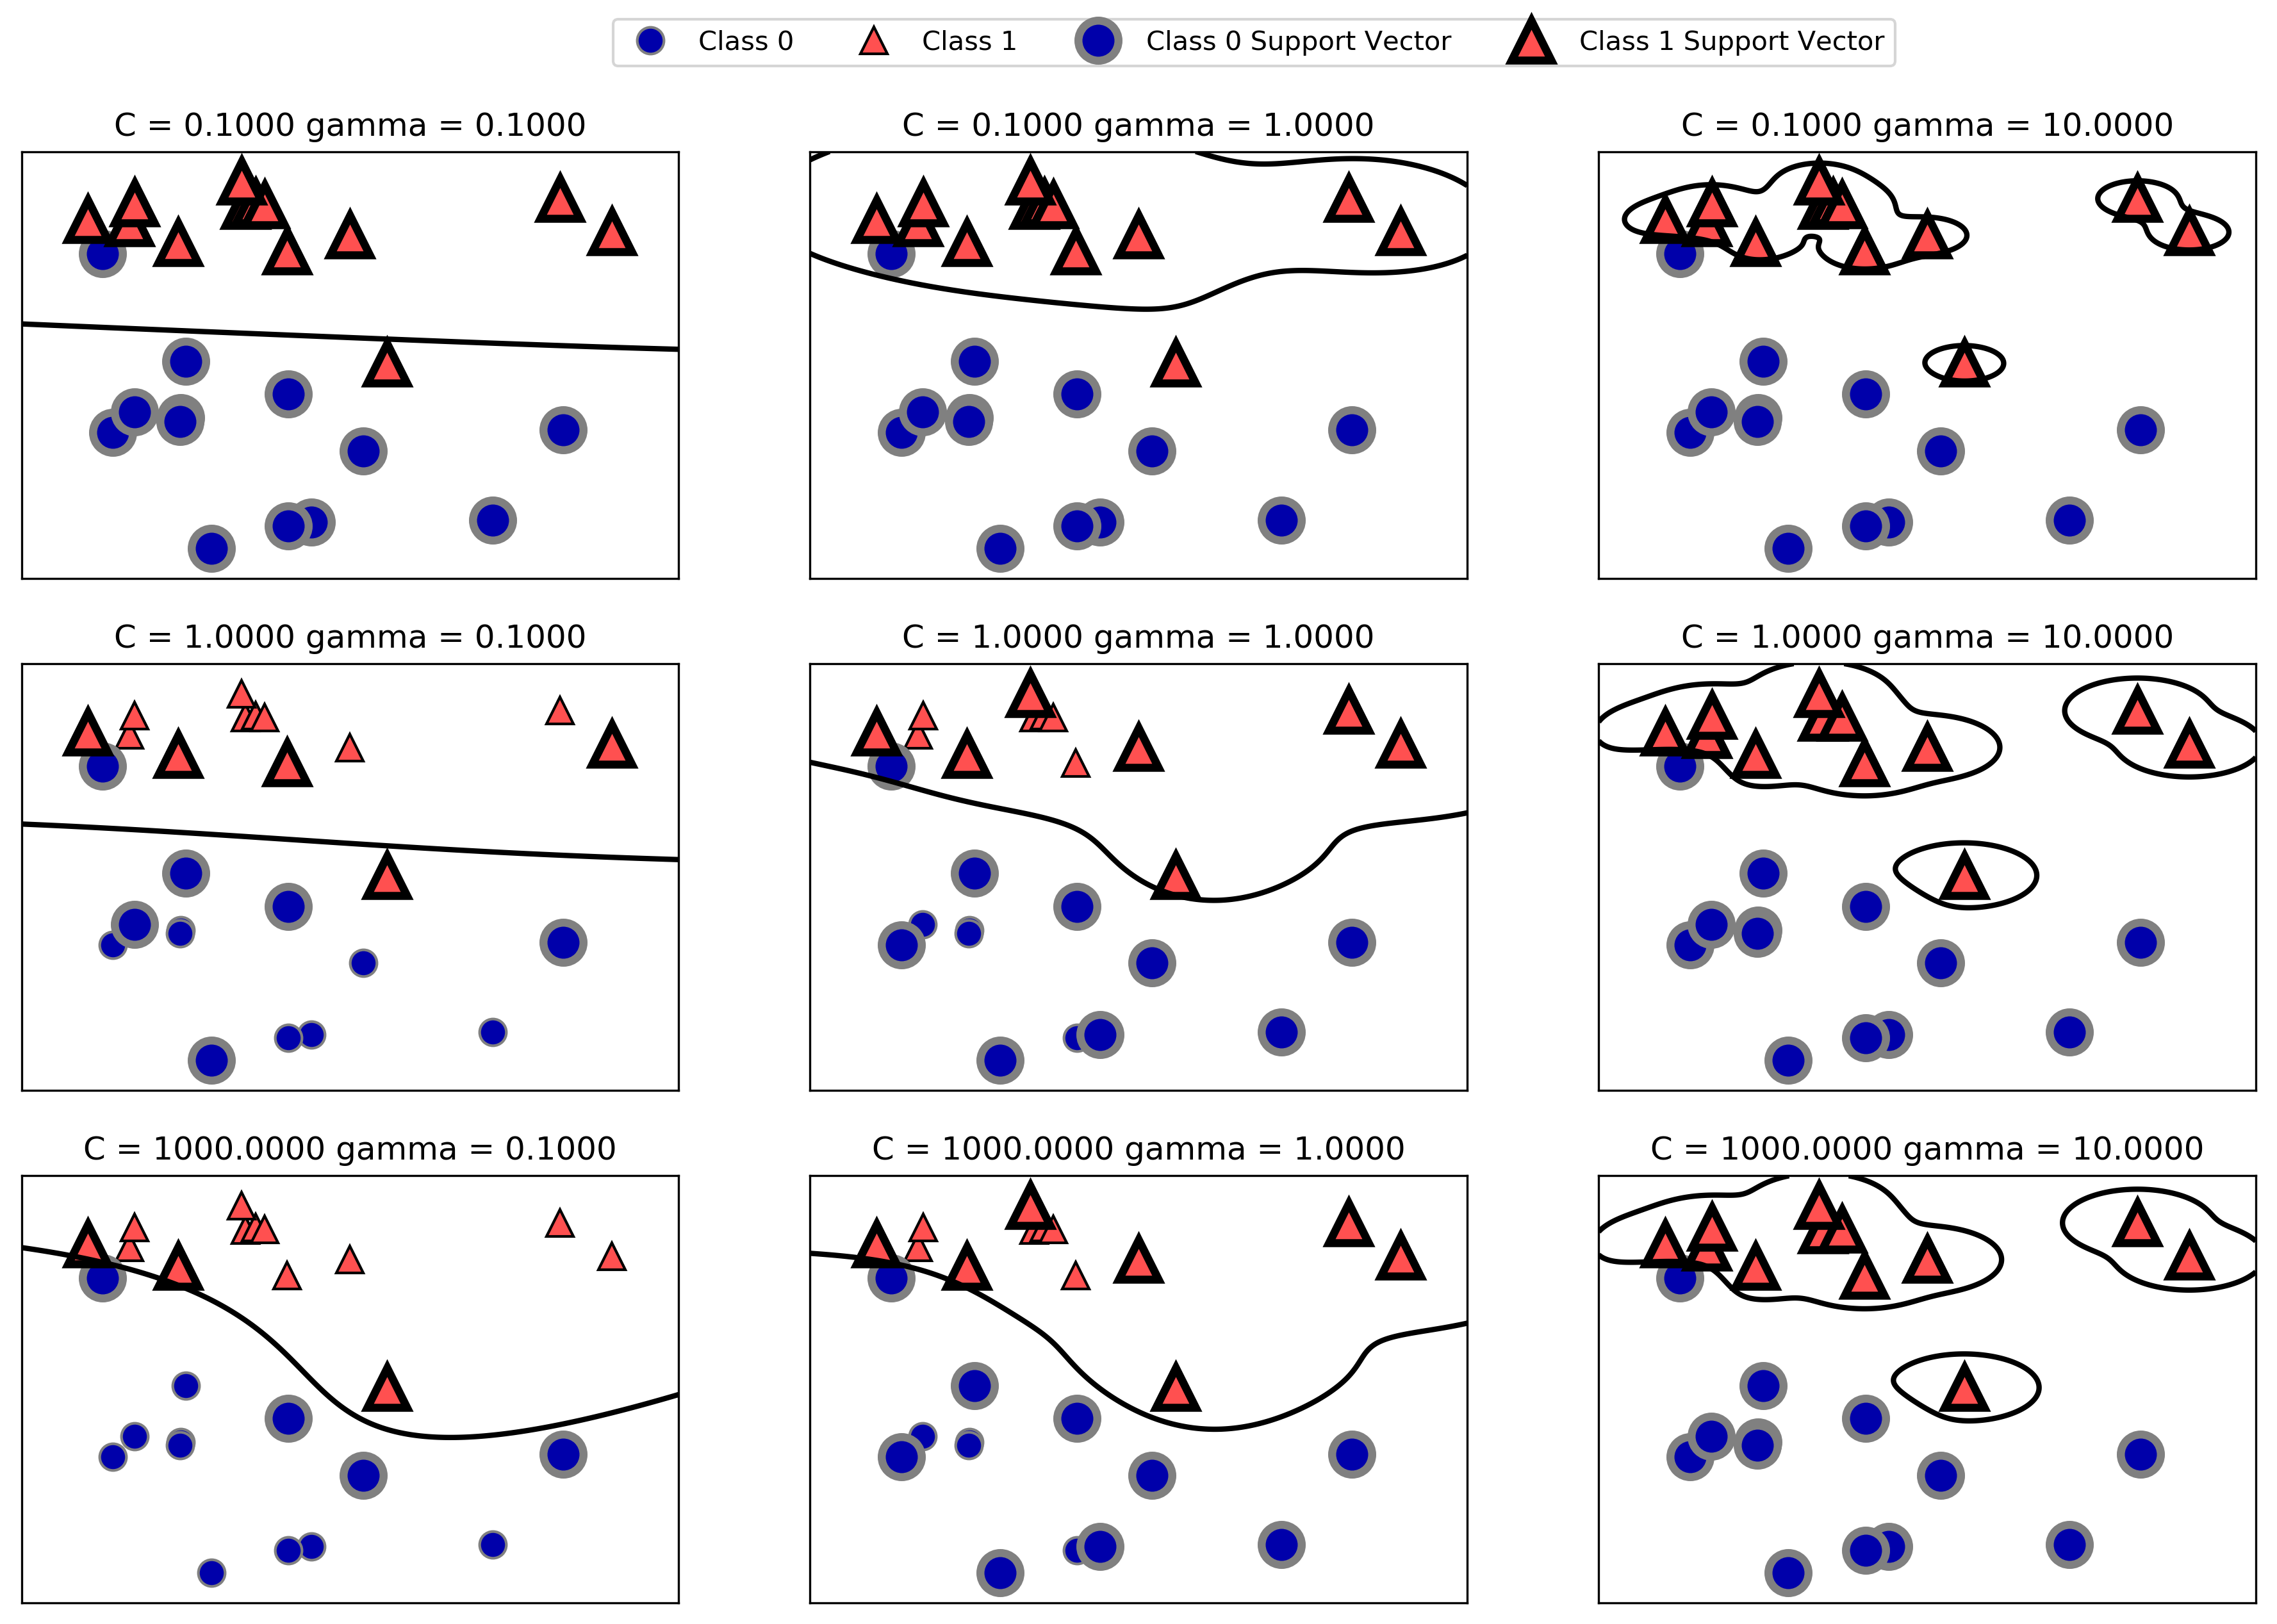

In [67]:
fig, axs = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axs, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axs[0,0].legend(['Class 0', "Class 1", "Class 0 Support Vector","Class 1 Support Vector"], ncol=4, loc=(.9, 1.2))

In [68]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)

print("Train Data Accuracy : {:.3f}".format(svc.score(X_train, y_train)))
print("Test Data Accuracy : {:.3f}".format(svc.score(X_test, y_test)))

Train Data Accuracy : 1.000
Test Data Accuracy : 0.629


Text(0,0.5,'Feature size')

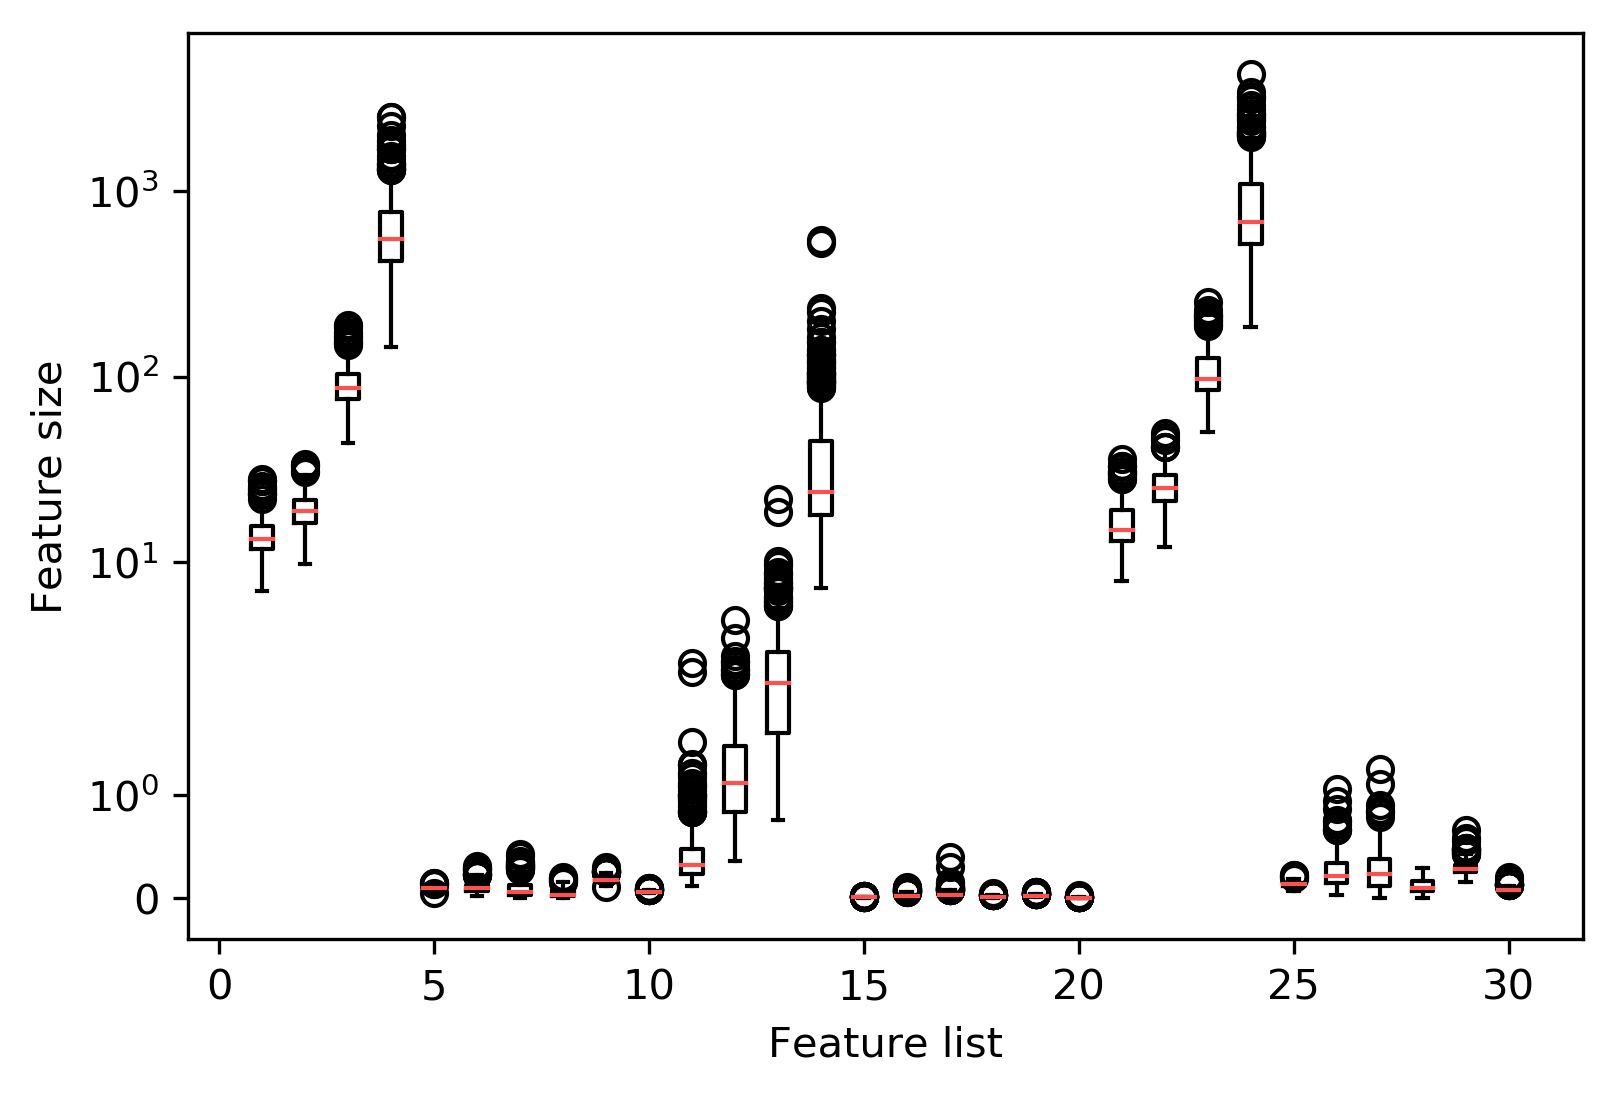

In [69]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale('symlog')
plt.xlabel("Feature list")
plt.ylabel("Feature size")

In [70]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training
print("Minimum Feature", X_train_scaled.min(axis=0))
print("Maximum Feature", X_train_scaled.max(axis=0))

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Train Data Accuracy : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Test Data Accuracy : {:.3f}".format(svc.score(X_test_scaled, y_test)))

Minimum Feature [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum Feature [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Train Data Accuracy : 0.948
Test Data Accuracy : 0.951


In [71]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Train Data Accuracy : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Test Data Accuracy : {:.3f}".format(svc.score(X_test_scaled, y_test)))

Train Data Accuracy : 0.988
Test Data Accuracy : 0.972


## Neural Network

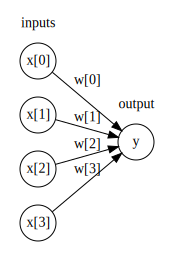

In [73]:
display(mglearn.plots.plot_logistic_regression_graph())

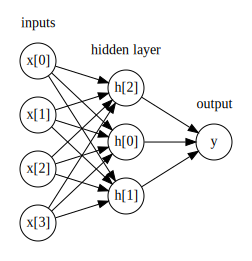

In [74]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0,0.5,'relu(x), tanh(x)')

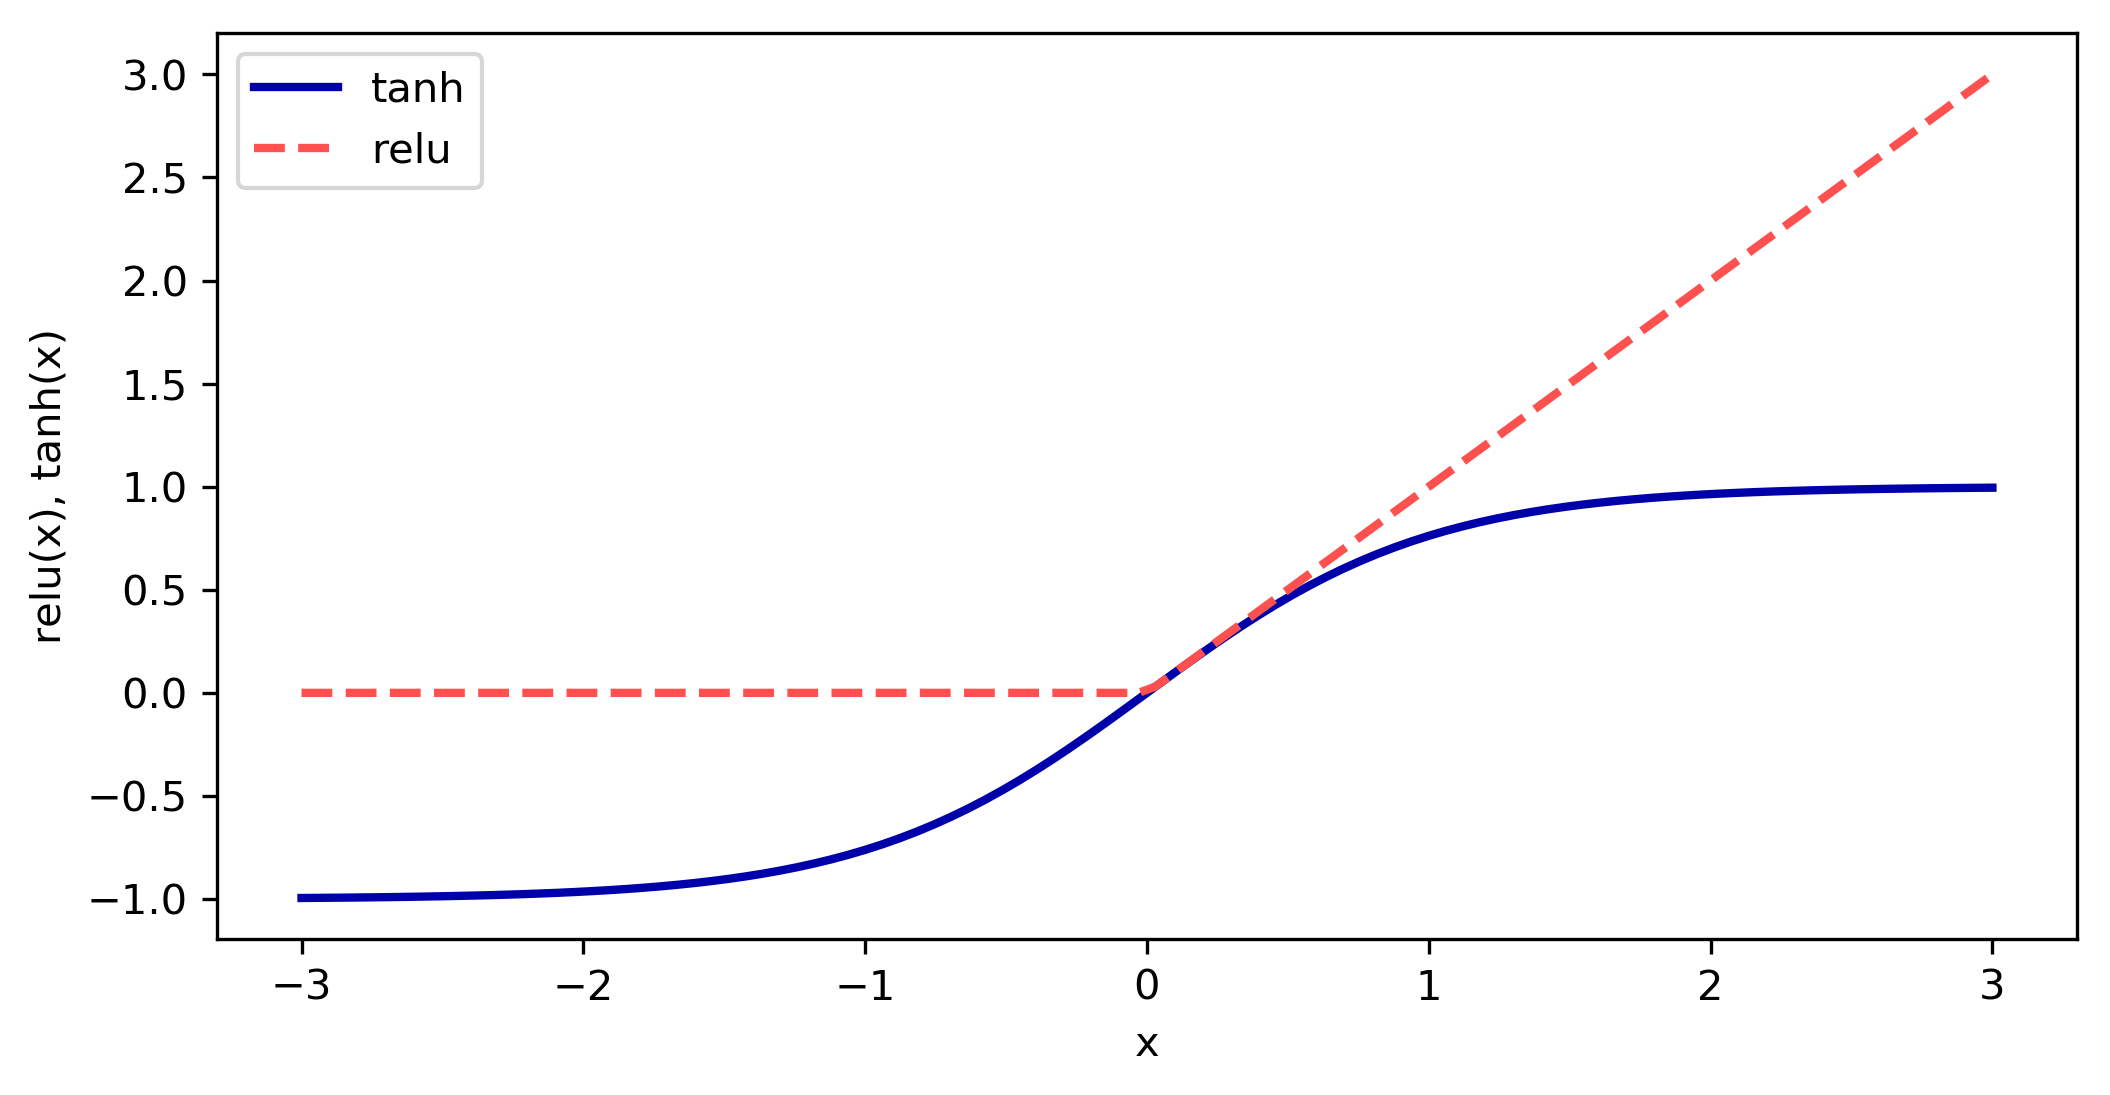

In [75]:
line = np.linspace(-3,3,100)
plt.figure(figsize=(8,4))
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line,0), linestyle='--', label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

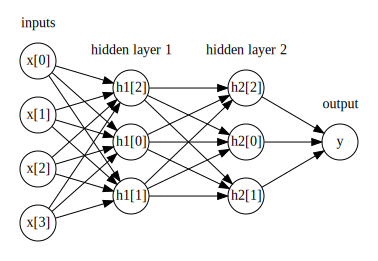

In [76]:
display(mglearn.plots.plot_two_hidden_layer_graph())

Text(0,0.5,'Feature 1')

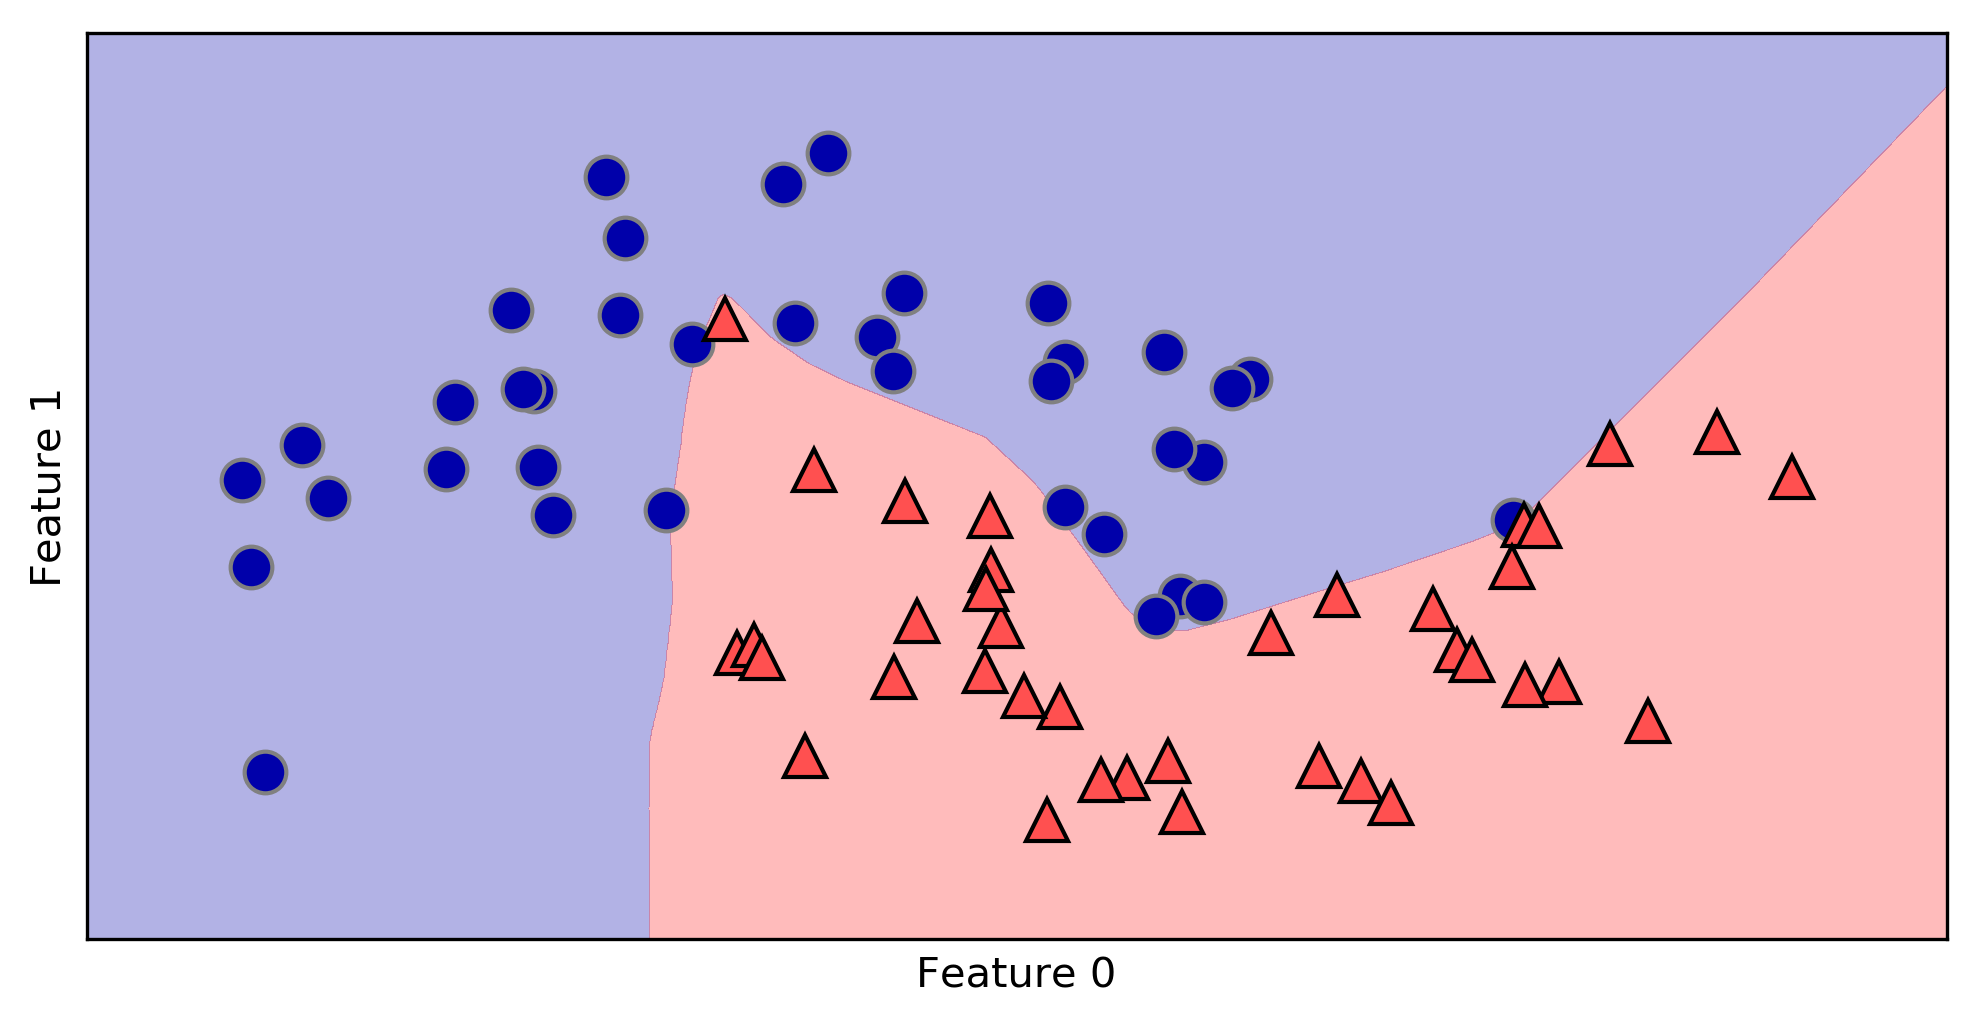

In [77]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
plt.figure(figsize=(8,4))
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0,0.5,'Feature 1')

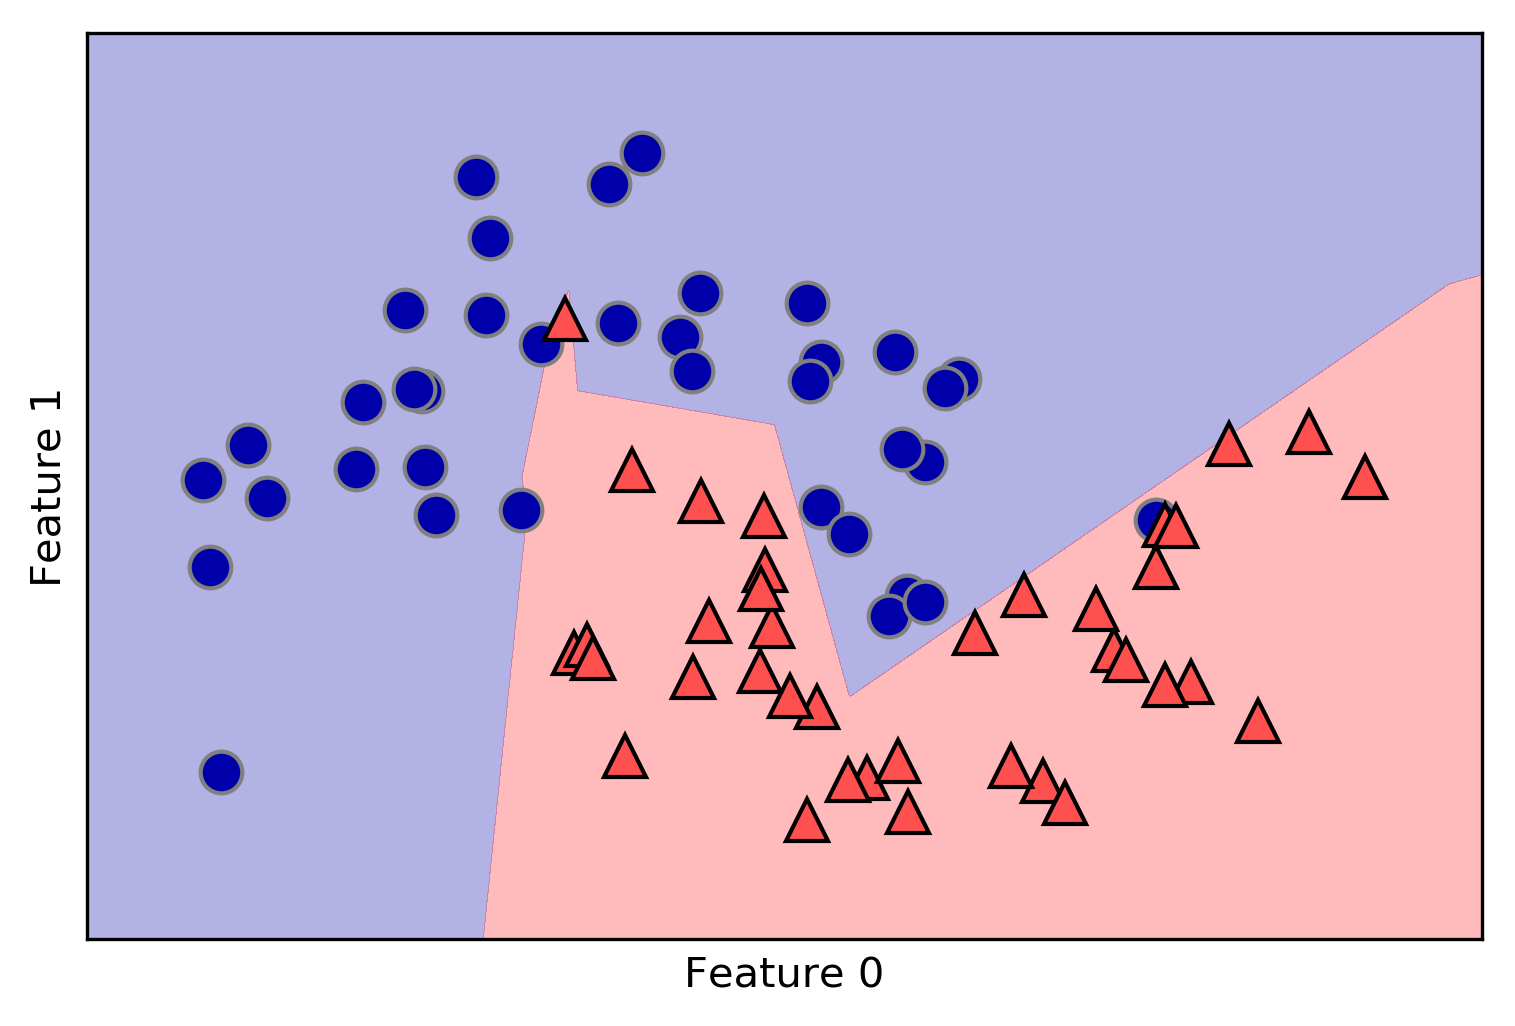

In [78]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=10)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0,0.5,'Feature 1')

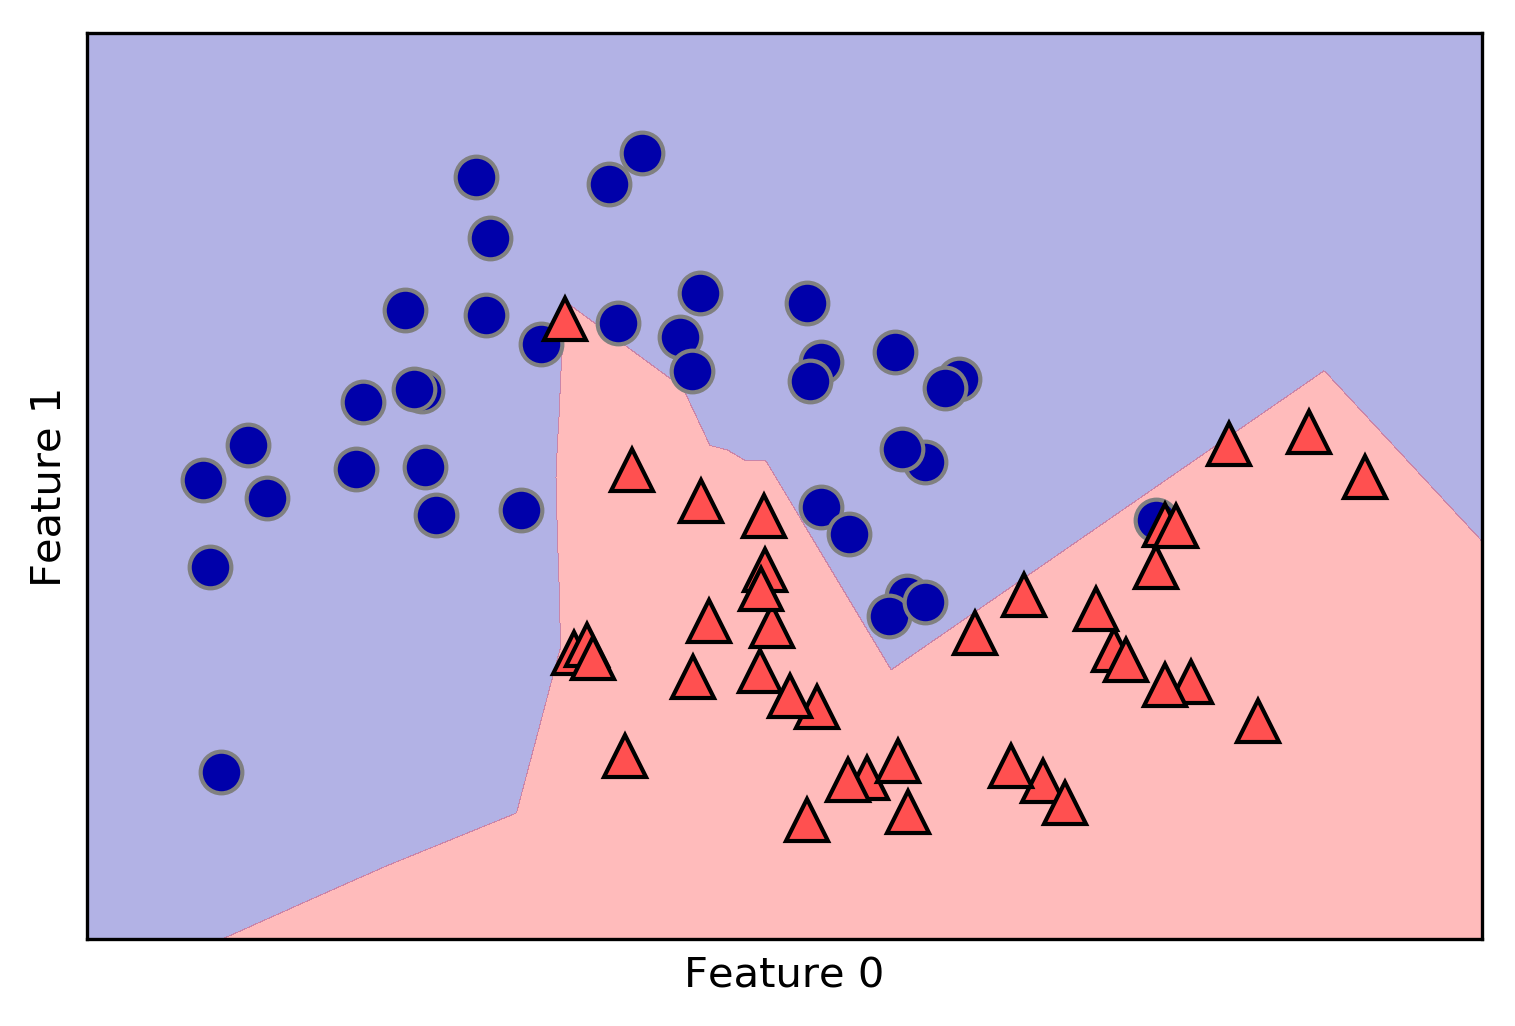

In [79]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0,0.5,'Feature 1')

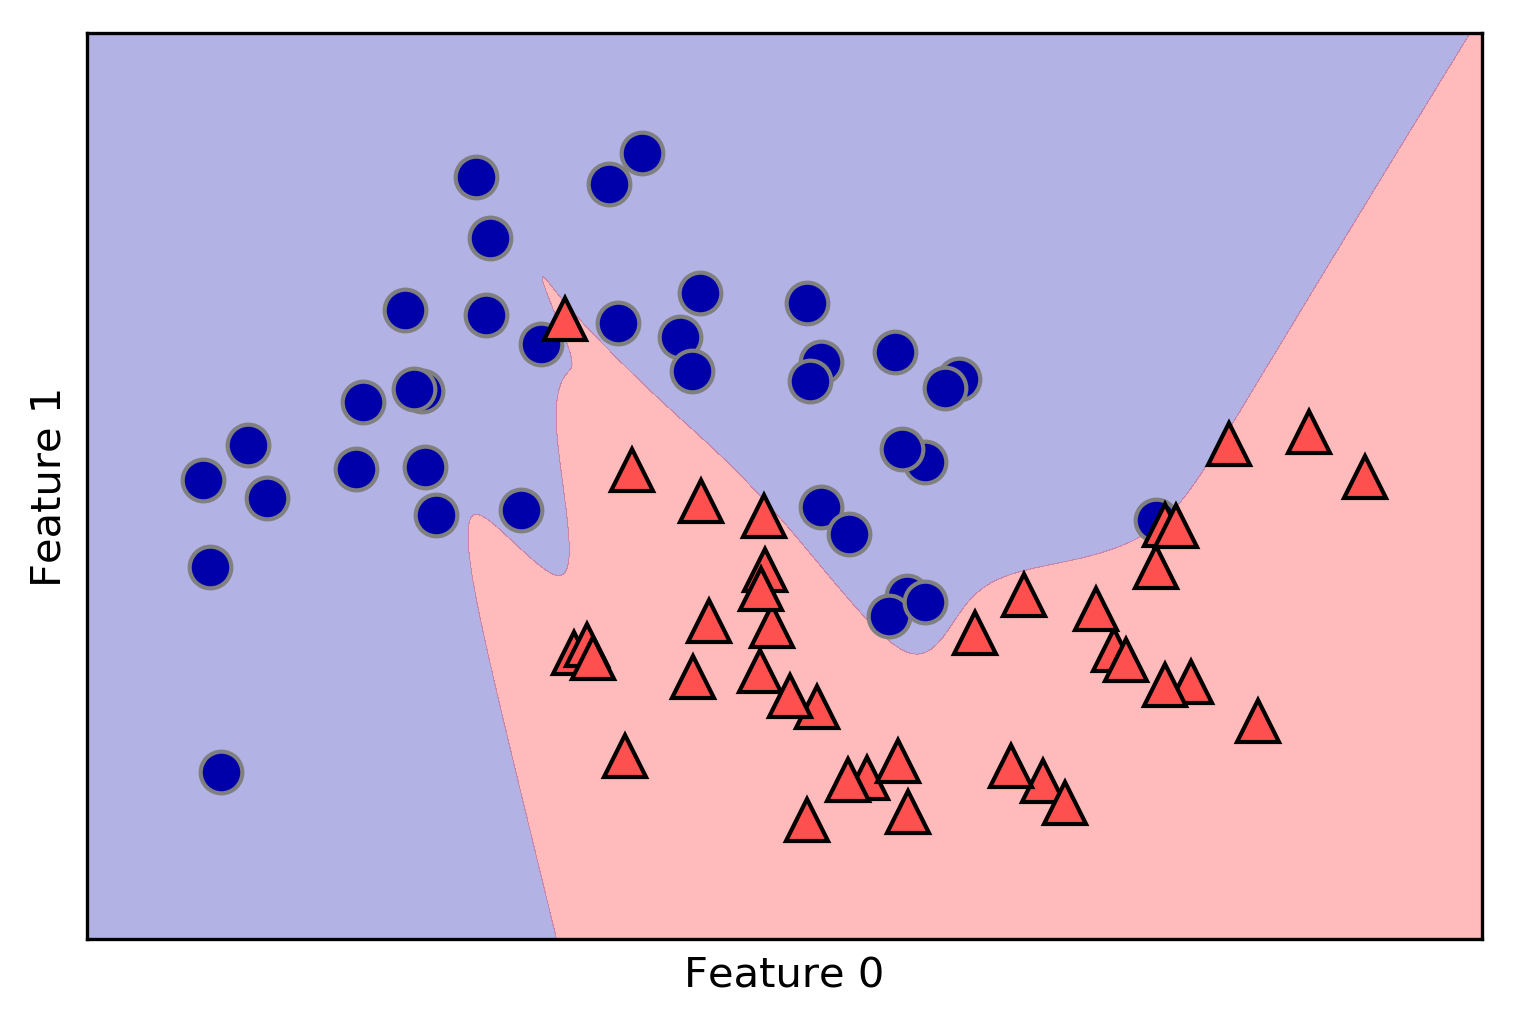

In [80]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10], activation='tanh')
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

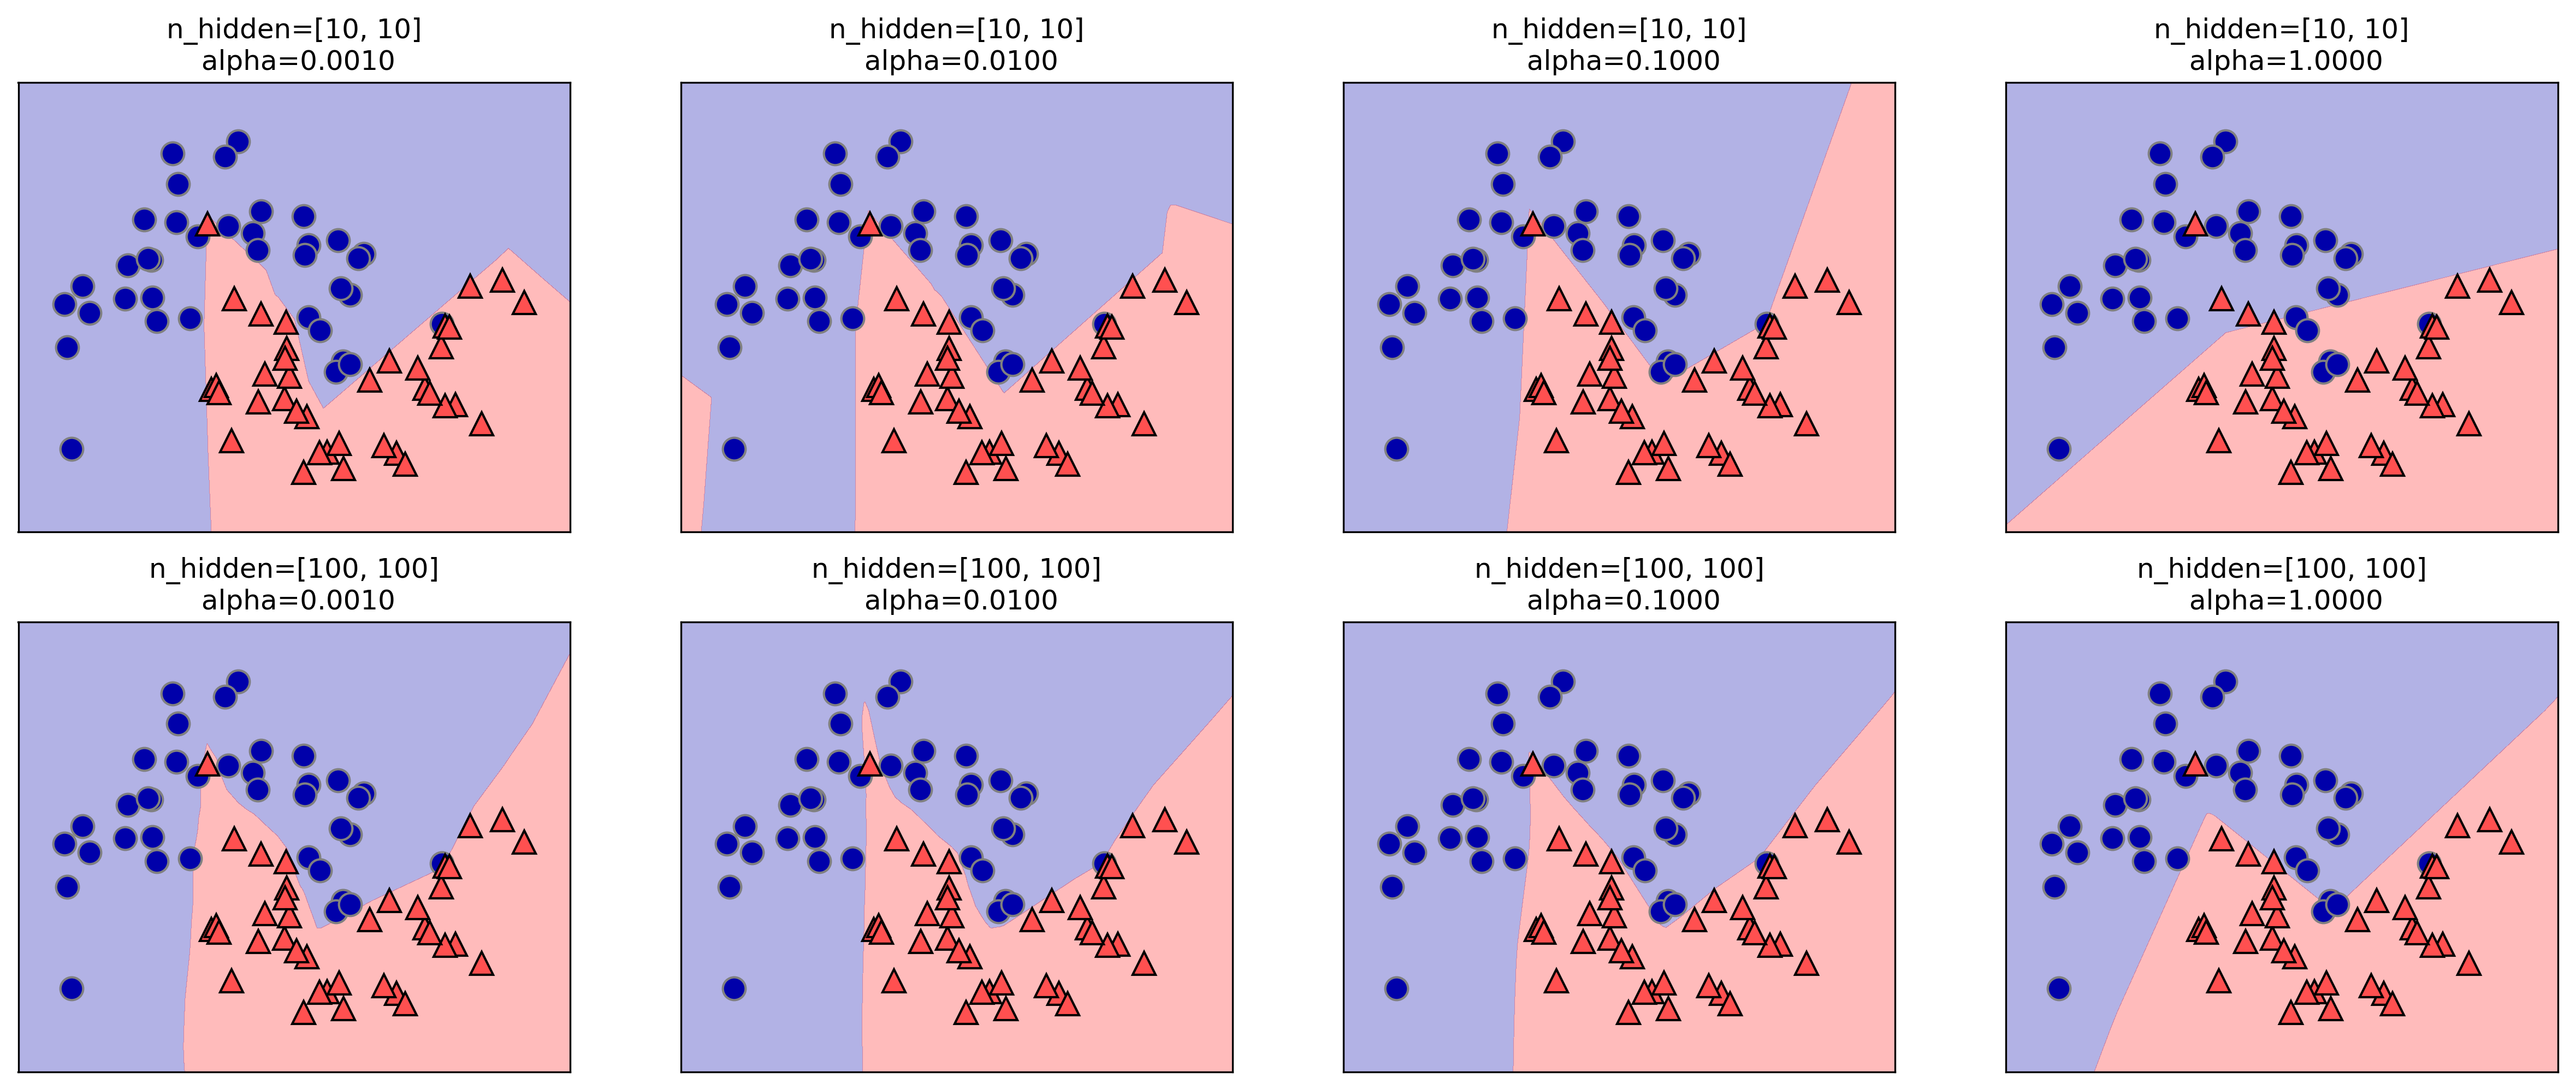

In [81]:
fig, axs = plt.subplots(2,4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axs, [10,100]):
    for ax, alpha in zip(axx, [0.001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\n alpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

In [82]:
print("Max value of feature Breast cancer\n", cancer.data.max(axis=0))

Max value of feature Breast cancer
 [  28.11    39.28   188.5   2501.       0.163    0.345    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.079    0.03    36.04    49.54   251.2   4254.
    0.223    1.058    1.252    0.291    0.664    0.207]


In [83]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Train Accuracy : {:.3f}".format(mlp.score(X_train, y_train)))
print("Test Accuracy : {:.3f}".format(mlp.score(X_test, y_test)))

Train Accuracy : 0.890
Test Accuracy : 0.923


In [84]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Train Accuracy : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test Accuracy : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Train Accuracy : 0.993
Test Accuracy : 0.986


<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

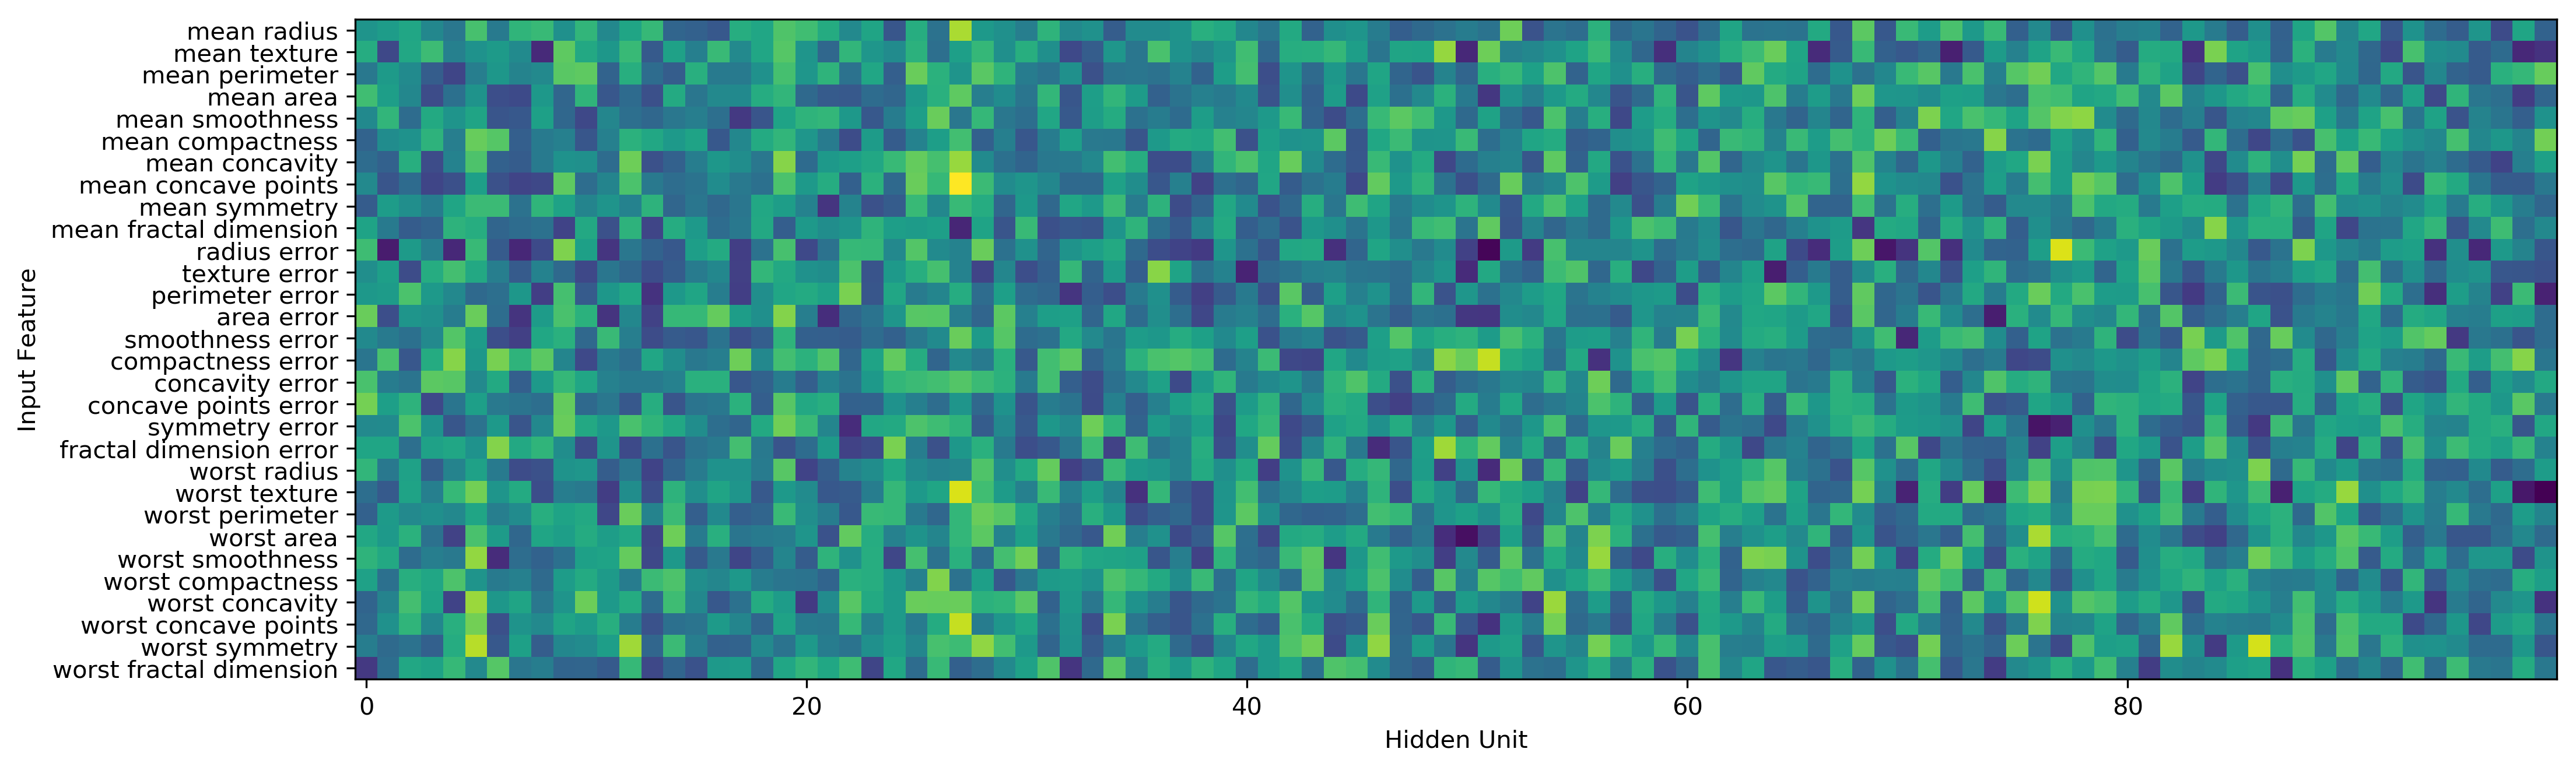

In [85]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Hidden Unit')
plt.ylabel('Input Feature')
plt.colorbar

## Uncertainty estimation

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

y_named = np.array(['blue', 'red'])[y]
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [95]:
print("Train Accuracy : {:.3f}".format(gbrt.score(X_train, y_train_named)))
print("Test Accuracy : {:.3f}".format(gbrt.score(X_test, y_test_named)))

Train Accuracy : 1.000
Test Accuracy : 0.880


In [96]:
print('X_test.shape', X_test.shape)
print('Uncertainty Estimation', gbrt.decision_function(X_test).shape)

X_test.shape (25, 2)
Uncertainty Estimation (25,)


In [97]:
print("Decision Function:\n", gbrt.decision_function(X_test)[:6])

Decision Function:
 [-6.022  4.615 -4.5    6.674 -6.022 -7.432]


In [98]:
print("Probablity  Shape:\n", gbrt.predict_proba(X_test).shape)

Probablity  Shape:
 (25, 2)


In [99]:
print("Decision Function:\n", gbrt.predict_proba(X_test)[:6])

Decision Function:
 [[0.998 0.002]
 [0.01  0.99 ]
 [0.989 0.011]
 [0.001 0.999]
 [0.998 0.002]
 [0.999 0.001]]


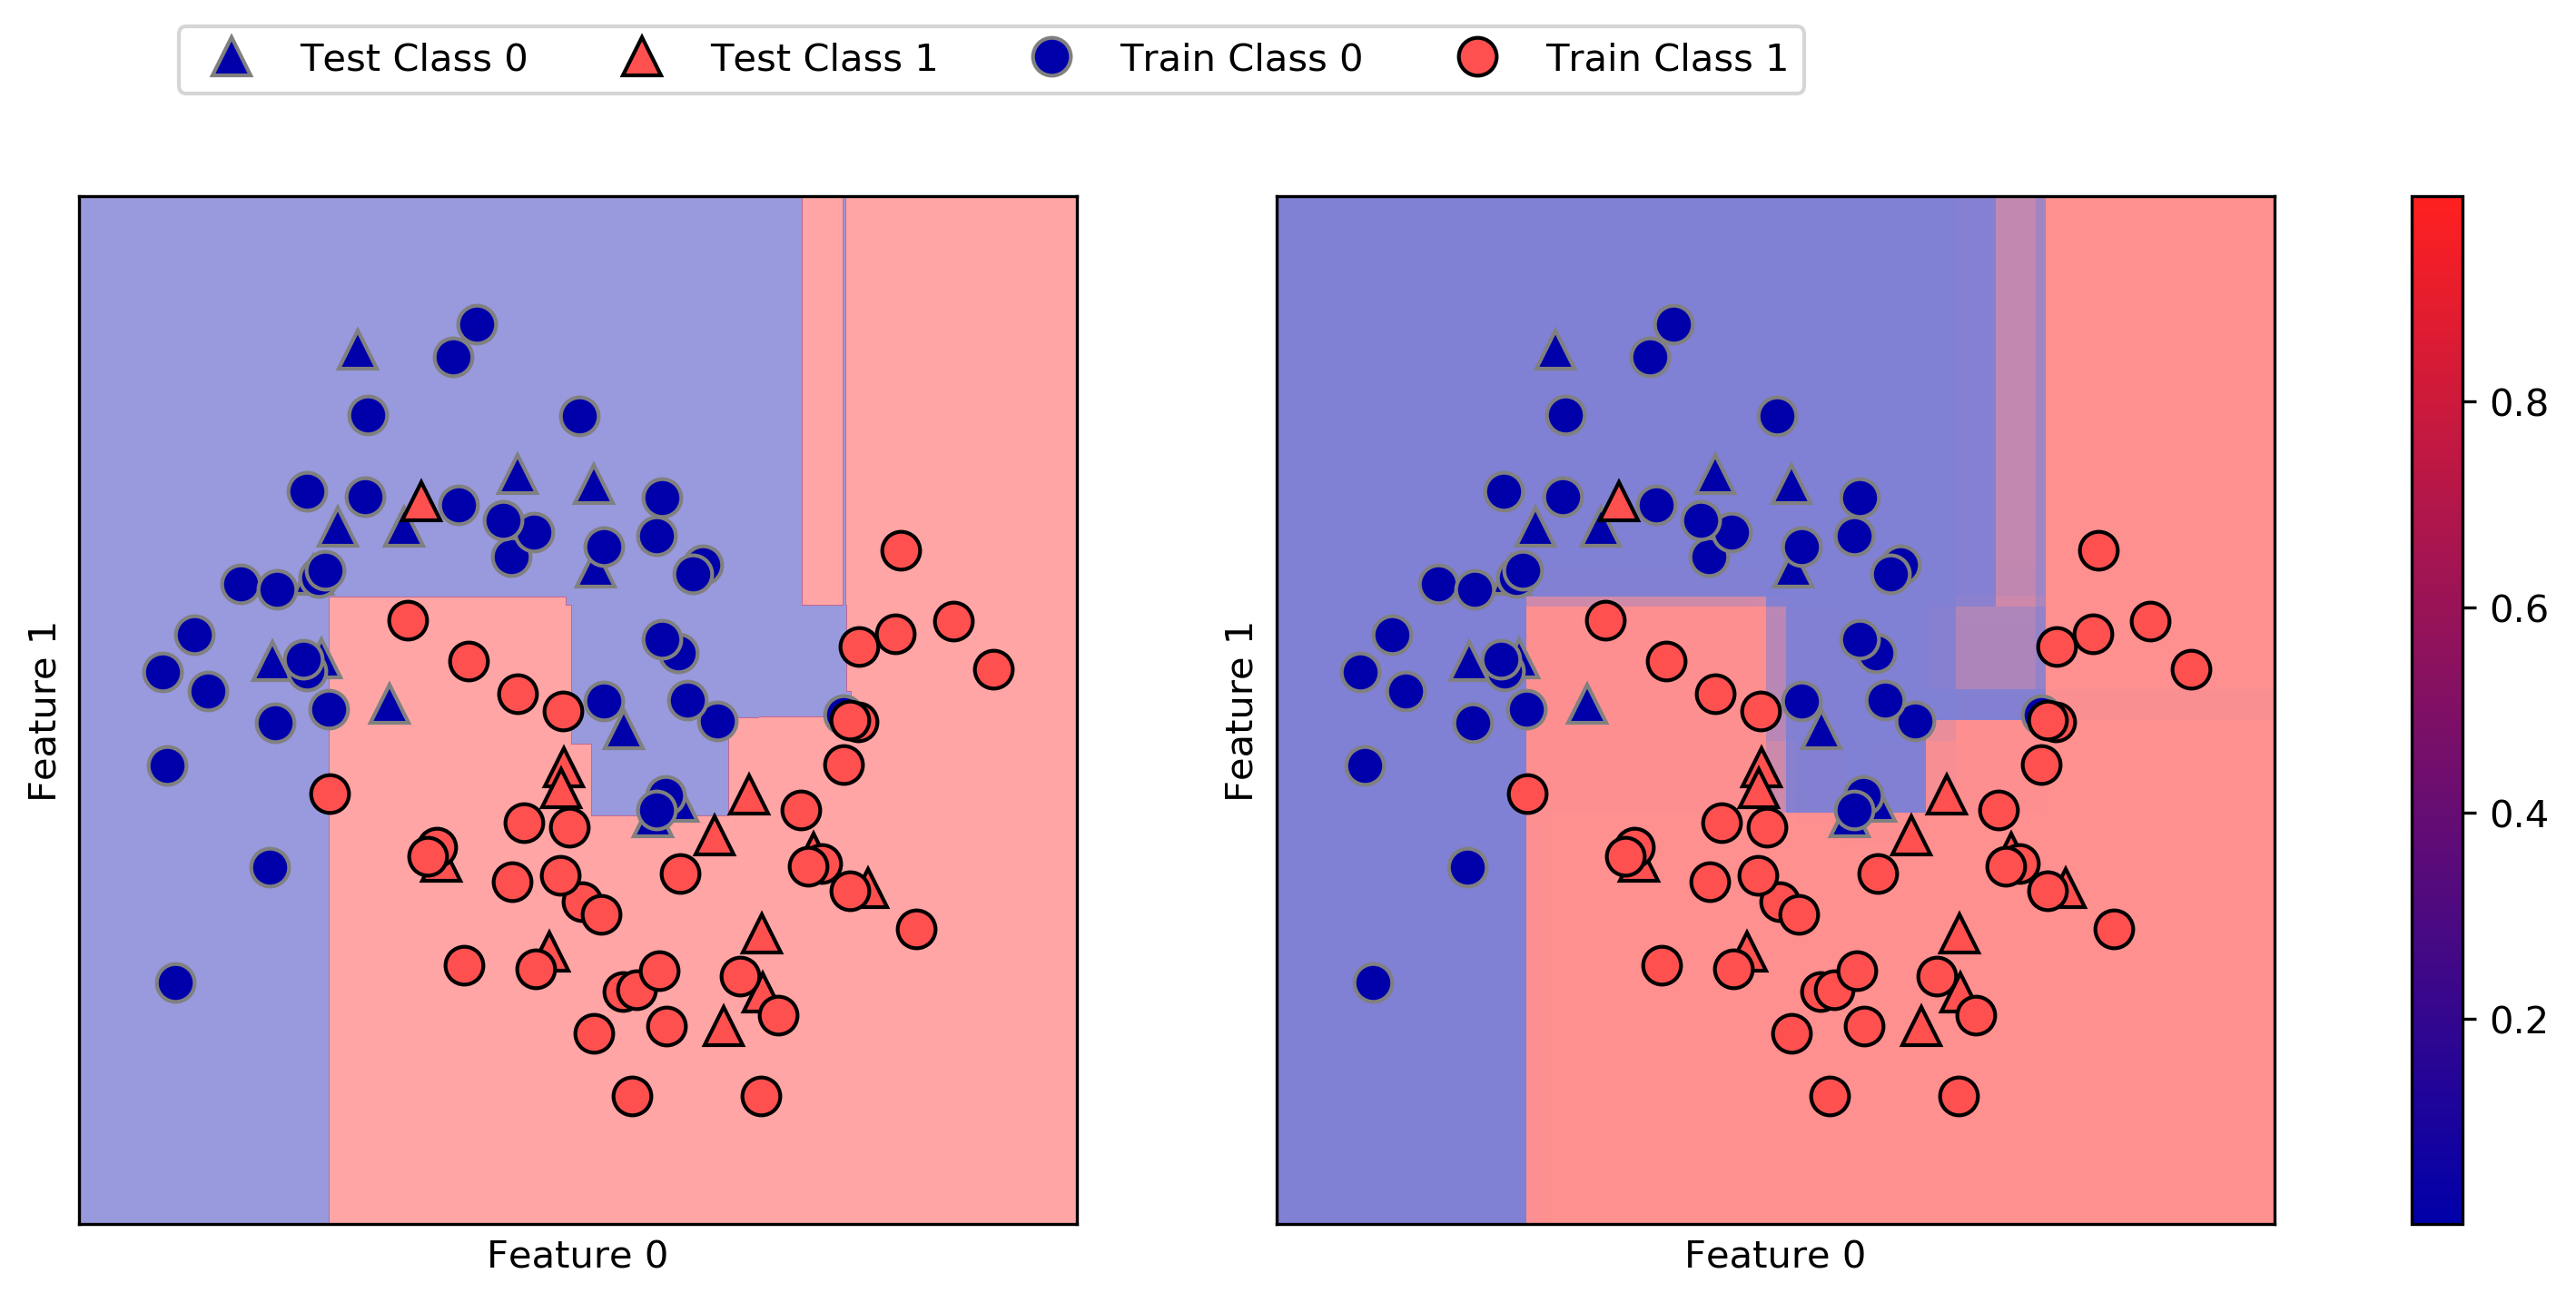

In [103]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axs[0], alpha=.4, fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axs[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axs:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    
cbar = plt.colorbar(score_image, ax=axs.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axs[0].legend(['Test Class 0', 'Test Class 1', 'Train Class 0', 'Train Class 1'], ncol=4, loc=(.1,1.1))